In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In [2]:
credit_data = pd.read_csv(r'C:\Users\Liv\Documents\Python Scripts\credit_data.csv')
credit_data

,OBS,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,1,0,6,4,0,0,0,1,0,0,...,67.0,0,0,1,2,2,1,1,0,1
1,2,1,48,2,0,0,0,1,0,0,...,22.0,0,0,1,1,2,1,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,49.0,0,0,1,1,1,2,0,0,1
3,4,0,42,2,0,0,1,0,0,0,...,45.0,0,0,0,1,2,2,0,0,1
4,5,0,24,3,1,0,0,0,0,0,...,53.0,0,0,0,2,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,12,2,0,0,1,0,0,0,...,31.0,0,0,1,1,1,1,0,0,1
996,997,0,30,2,0,1,0,0,0,0,...,40.0,0,0,1,1,3,1,1,0,1
997,998,3,12,2,0,0,0,1,0,0,...,38.0,0,0,1,1,2,1,0,0,1
998,999,0,45,2,0,0,0,1,0,0,...,23.0,0,0,0,1,2,1,1,0,0


In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBS               1000 non-null   int64  
 1   CHK_ACCT          1000 non-null   int64  
 2   DURATION          1000 non-null   int64  
 3   HISTORY           1000 non-null   int64  
 4   NEW_CAR           1000 non-null   int64  
 5   USED_CAR          1000 non-null   int64  
 6   FURNITURE         1000 non-null   int64  
 7   RADIO/TV          1000 non-null   int64  
 8   EDUCATION         1000 non-null   int64  
 9   RETRAINING        1000 non-null   int64  
 10  AMOUNT            1000 non-null   int64  
 11  SAV_ACCT          1000 non-null   int64  
 12  EMPLOYMENT        996 non-null    float64
 13  INSTALL_RATE      1000 non-null   int64  
 14  MALE_DIV          1000 non-null   int64  
 15  MALE_SINGLE       1000 non-null   int64  
 16  MALE_MAR_or_WID   1000 non-null   int64  
 

In [4]:
credit_data.isnull().sum() # 결측치 발견: Employment 4개, Age 4개

OBS                 0
CHK_ACCT            0
DURATION            0
HISTORY             0
NEW_CAR             0
USED_CAR            0
FURNITURE           0
RADIO/TV            0
EDUCATION           0
RETRAINING          0
AMOUNT              0
SAV_ACCT            0
EMPLOYMENT          4
INSTALL_RATE        0
MALE_DIV            0
MALE_SINGLE         0
MALE_MAR_or_WID     0
CO-APPLICANT        0
GUARANTOR           0
PRESENT_RESIDENT    0
REAL_ESTATE         0
PROP_UNKN_NONE      0
AGE                 4
OTHER_INSTALL       0
RENT                0
OWN_RES             0
NUM_CREDITS         0
JOB                 0
NUM_DEPENDENTS      0
TELEPHONE           0
FOREIGN             0
RESPONSE            0
dtype: int64

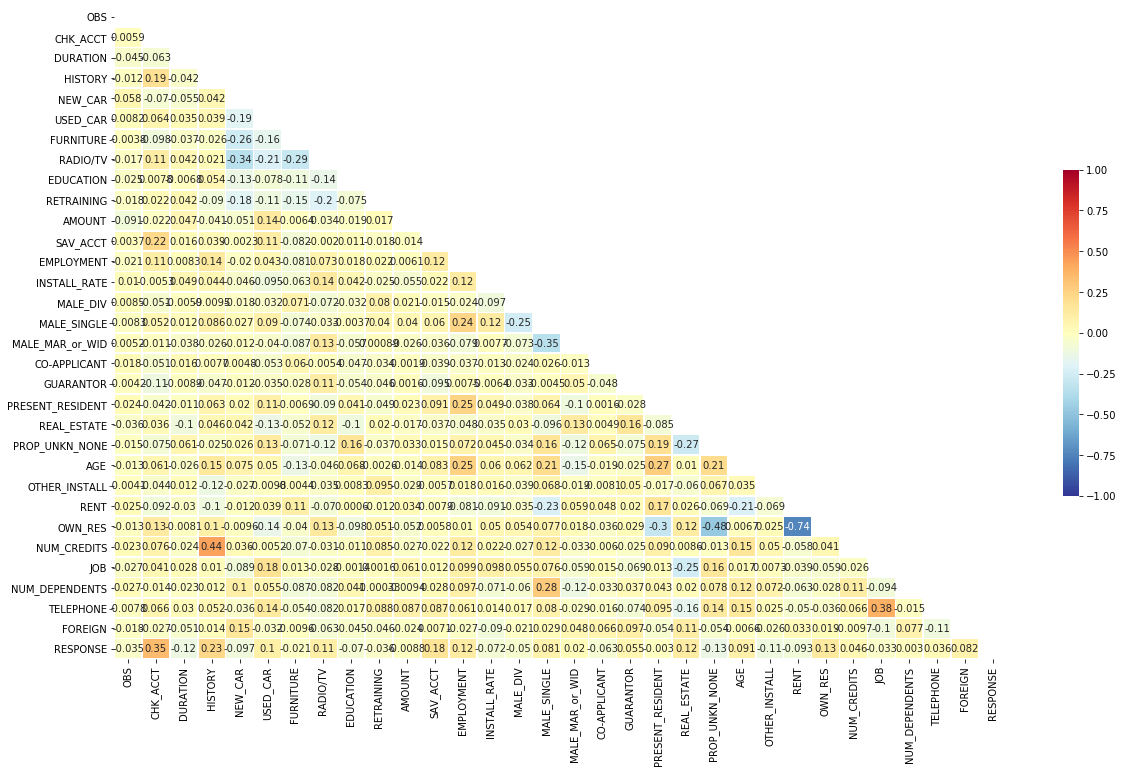

In [5]:
# 변수들 간 상관관계 히트맵

plt.figure(figsize = (20,12))
mask = np.zeros_like(credit_data.corr(), dtype = np.bool) # 삼각형 마스크 만들기 (위쪽 삼각형은 True, 아래쪽 삼각형은 False)
mask[np.triu_indices_from(mask)] = True # 삼각형 한 개만 출력
sns.heatmap(data = credit_data.corr(), 
            annot = True, # 실제 값 나타내기 
            mask = mask, # 표시하지 않을 마스크 부분 지정
            linewidths = .5, # 경계면을 실선으로 구분
            cmap = 'RdYlBu_r', # Red, Yellow, Blue 색상으로 표시
            cbar_kws={"shrink": .5}, # 컬러바 크기를 절반으로 줄이기
            vmin = -1, vmax = 1) # 컬러바를 -1 ~ 1 범위로 표시

In [6]:
credit_data['RESPONSE'].value_counts() 
# RESPONSE : Credit rating is good; Binary (0: No, 1: Yes) 신용여부

1    700
0    300
Name: RESPONSE, dtype: int64

## 결측치 처리 

### Employment (재직기간)

In [7]:
# EMPLOYMENT : Present employment since; Categorical
# 0: unemployed 
# 1: < 1 year 
# 2: 1 <= ... < 4 years   
# 3: 4 <= ... < 7 years 
# 4: >= 7 years 

In [8]:
credit_data['EMPLOYMENT'].value_counts(dropna = False)

2.0    337
4.0    252
3.0    174
1.0    171
0.0     62
NaN      4
Name: EMPLOYMENT, dtype: int64

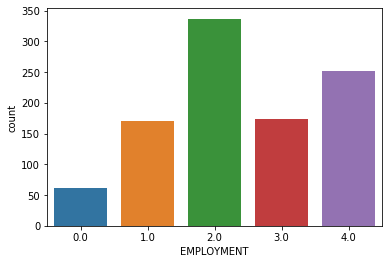

In [9]:
sns.countplot('EMPLOYMENT', data = credit_data)

In [10]:
credit_data['EMPLOYMENT'].describe() 

count    996.000000
mean       2.384538
std        1.208730
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: EMPLOYMENT, dtype: float64

In [11]:
credit_data[credit_data['EMPLOYMENT'].isnull()] # EMPLOYMENT에서 결측치가 발견된 행만 출력 

,OBS,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
113,114,3,36,4,1,0,0,0,0,0,...,25.0,1,0,1,2,2,1,1,0,0
258,259,3,15,2,0,1,0,0,0,0,...,23.0,0,0,1,1,2,1,1,0,1
374,375,1,60,1,0,0,0,0,0,0,...,60.0,1,0,0,2,3,1,1,0,0
593,594,1,24,2,1,0,0,0,0,0,...,20.0,0,1,0,1,1,1,1,0,0


In [12]:
credit_data = credit_data.dropna(subset = ['EMPLOYMENT']) # 결측치가 있는 행 제거

In [13]:
credit_data['EMPLOYMENT'].isnull().sum()

0

In [14]:
credit_data['EMPLOYMENT'] = credit_data['EMPLOYMENT'].astype(int) # float(실수)을 int(정수)로 바꾸기

C:\Users\Liv\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Response Rate - EMPLOYMENT')

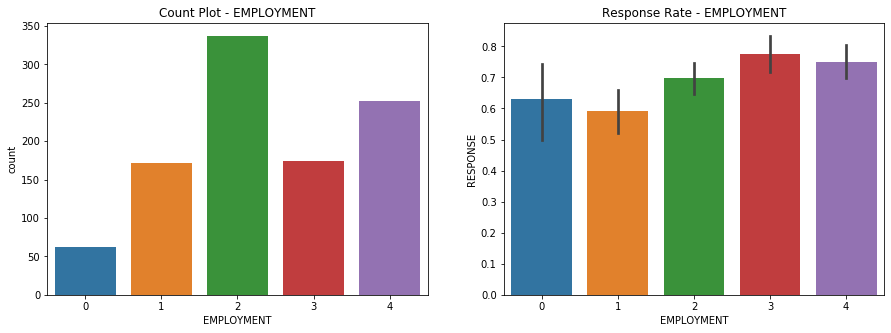

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('EMPLOYMENT', data = credit_data, ax = ax[0]) # 재직기간 현황
ax[0].set_title('Count Plot - EMPLOYMENT')
sns.barplot(x = 'EMPLOYMENT', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 재직기간에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - EMPLOYMENT')

In [16]:
def visualize_distribution(attr):    
    yes_df = credit_data[credit_data['RESPONSE'] == 1 ]
    no_df = credit_data[credit_data['RESPONSE'] == 0 ]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_yes_df = yes_df[[attr, 'RESPONSE']].groupby(attr).count()
    attr_no_df = no_df[[attr, 'RESPONSE']].groupby(attr).count()
    ax[0].barh( attr_yes_df['RESPONSE'].index.tolist(), attr_yes_df['RESPONSE'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_no_df['RESPONSE'].index.tolist(), attr_no_df['RESPONSE'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('YES')
    ax[1].set_title('NO')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    num_para_change=[0,1,2,3,4,5]
    if attr in num_para_change:
        for i, v in enumerate(attr_yes_df['RESPONSE'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_no_df['RESPONSE'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_yes_df['RESPONSE'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_no_df['RESPONSE'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

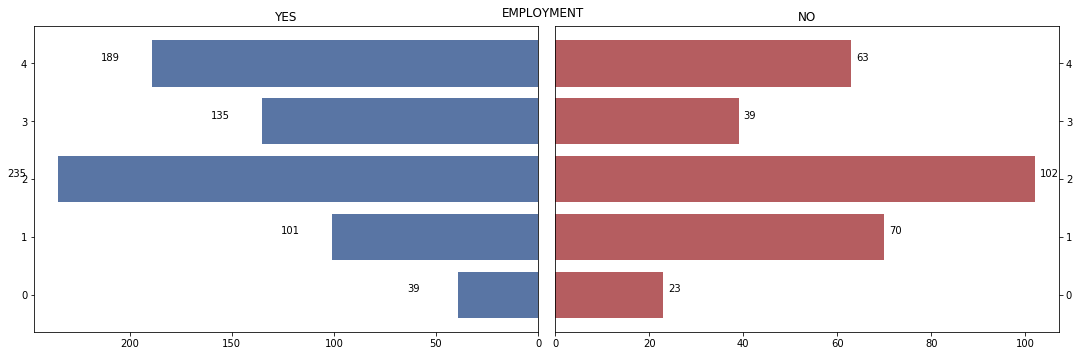

In [17]:
visualize_distribution('EMPLOYMENT')

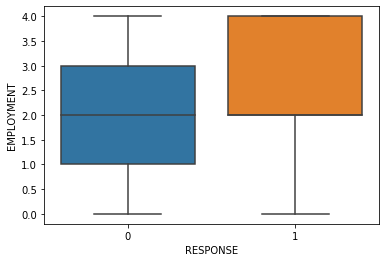

In [18]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'EMPLOYMENT')

### Age (연령) 

In [19]:
# AGE : Age in years; Numerical

In [20]:
credit_data['AGE'].value_counts(dropna = False)

27.0    50
26.0    49
23.0    47
24.0    44
28.0    42
25.0    40
35.0    40
30.0    40
36.0    39
31.0    38
29.0    37
32.0    34
34.0    32
33.0    32
37.0    29
22.0    27
40.0    25
38.0    24
42.0    22
39.0    21
46.0    18
43.0    17
41.0    17
47.0    17
44.0    17
45.0    15
49.0    14
21.0    14
20.0    13
48.0    12
50.0    12
54.0    10
52.0     9
57.0     9
63.0     8
55.0     8
51.0     8
53.0     7
61.0     7
64.0     5
58.0     5
60.0     5
66.0     5
65.0     5
74.0     4
NaN      4
59.0     3
56.0     3
68.0     3
67.0     3
62.0     2
75.0     2
19.0     2
70.0     1
Name: AGE, dtype: int64

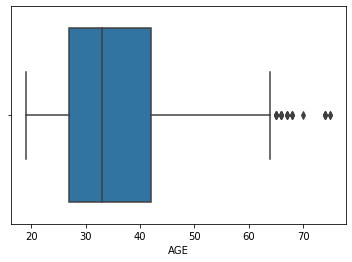

In [21]:
sns.boxplot('AGE', data = credit_data) # 최댓값 75(세) >>> 이상치 처리하지 않음

In [22]:
credit_data['AGE'].describe() 

count    992.000000
mean      35.588710
std       11.362045
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       75.000000
Name: AGE, dtype: float64

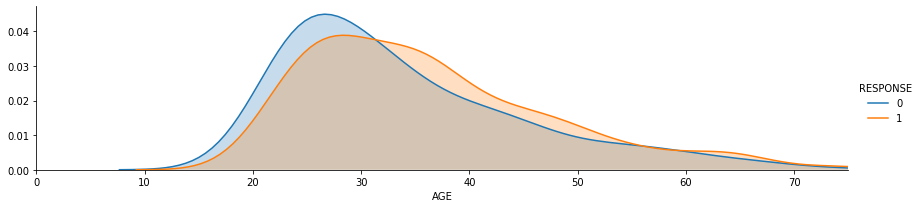

In [23]:
# 연령에 따른 신용평가(RESPONSE) >>> 30대 초반을 기점으로 그 이전에서는 0(Bad), 이후에서는 1(Good)이 더 높은 수치를 보임.
facet = sns.FacetGrid(credit_data, hue = 'RESPONSE', aspect = 4)
facet.map(sns.kdeplot, 'AGE', shade = True)
facet.set(xlim = (0, credit_data['AGE'].max()))
facet.add_legend()

In [24]:
credit_data[credit_data['AGE'].isnull()] # AGE에서 결측치가 발견된 행만 출력 

,OBS,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
14,15,0,15,2,1,0,0,0,0,0,...,NaN,0,1,0,1,2,1,0,0,1
92,93,3,12,4,0,0,0,1,0,0,...,NaN,1,0,1,1,1,2,0,0,0
225,226,3,36,0,0,0,0,0,0,0,...,NaN,0,0,1,2,2,1,0,0,1
357,358,3,36,3,0,0,0,1,0,0,...,NaN,0,0,1,2,3,1,1,0,0


In [25]:
credit_data = credit_data.dropna(subset = ['AGE']) # 결측치가 있는 행 제거

In [26]:
credit_data['AGE'].isnull().sum()

0

In [27]:
# 10대 ~ 70대로 AGE 데이터 분할
credit_data.loc[ credit_data['AGE'] <= 25, 'AGE'] = 0, # Student 
credit_data.loc[(credit_data['AGE'] > 25) & (credit_data['AGE'] <= 35), 'AGE'] = 1, # Young Adult
credit_data.loc[(credit_data['AGE'] > 35) & (credit_data['AGE'] <= 60), 'AGE'] = 2, # Adult
credit_data.loc[ credit_data['AGE'] > 60, 'AGE'] = 3 # Elderly

credit_data['AGE_cat'] = credit_data['AGE'] # AGE_cat이라는 새로운 변수열 생성
credit_data = credit_data.drop(['AGE'], axis = 1) # 기존의 AGE 변수열은 삭제

C:\Users\Liv\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Liv\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [28]:
credit_data['AGE_cat'] = credit_data['AGE_cat'].astype(int) 

In [29]:
credit_data

,OBS,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE,AGE_cat
0,1,0,6,4,0,0,0,1,0,0,...,0,0,1,2,2,1,1,0,1,3
1,2,1,48,2,0,0,0,1,0,0,...,0,0,1,1,2,1,0,0,0,0
2,3,3,12,4,0,0,0,0,1,0,...,0,0,1,1,1,2,0,0,1,2
3,4,0,42,2,0,0,1,0,0,0,...,0,0,0,1,2,2,0,0,1,2
4,5,0,24,3,1,0,0,0,0,0,...,0,0,0,2,2,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,12,2,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,1,1
996,997,0,30,2,0,1,0,0,0,0,...,0,0,1,1,3,1,1,0,1,2
997,998,3,12,2,0,0,0,1,0,0,...,0,0,1,1,2,1,0,0,1,2
998,999,0,45,2,0,0,0,1,0,0,...,0,0,0,1,2,1,1,0,0,0


In [30]:
credit_data['AGE_cat'].value_counts(dropna = False)

1    394
2    366
0    187
3     45
Name: AGE_cat, dtype: int64

Text(0.5, 1.0, 'Response Rate - AGE')

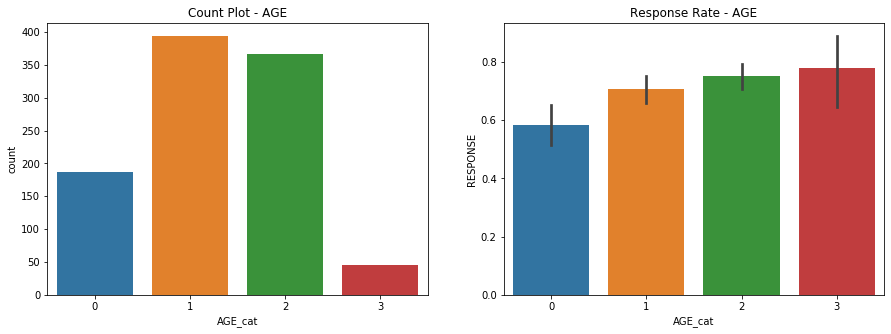

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('AGE_cat', data = credit_data, ax = ax[0]) # 연령 현황
ax[0].set_title('Count Plot - AGE')
sns.barplot(x = 'AGE_cat', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 연령에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - AGE')

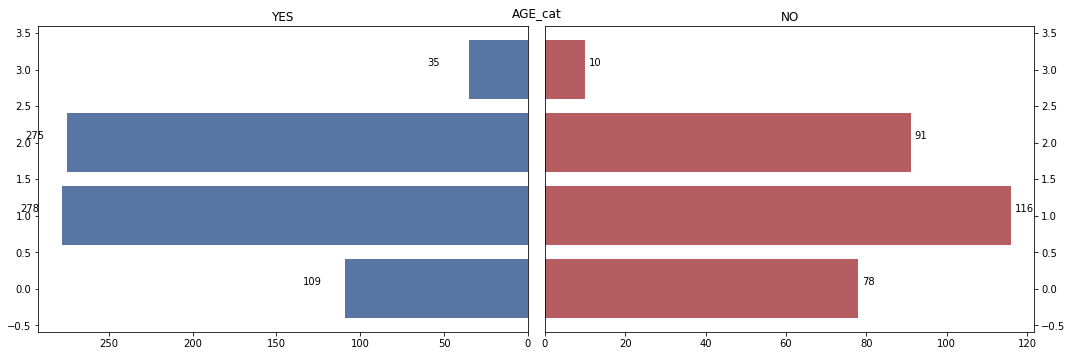

In [32]:
visualize_distribution('AGE_cat')

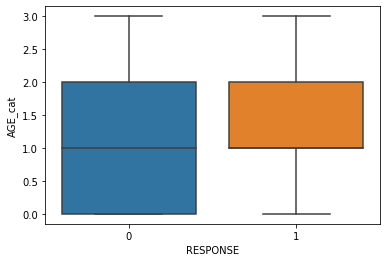

In [33]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'AGE_cat')

## 시각화, 이상치 처리

### CHK_ACCT (예금계좌)

In [34]:
# CHK_ACCT : Checking account status; Categorical 
# 0: < 0 DM         
# 1: 0 <=...< 200 DM  
# 2: <= 200 DM 
# 3: no checking account

In [35]:
credit_data['CHK_ACCT'].value_counts(dropna = False)

3    389
0    273
1    267
2     63
Name: CHK_ACCT, dtype: int64

Text(0.5, 1.0, 'Response Rate - CHK_ACCT')

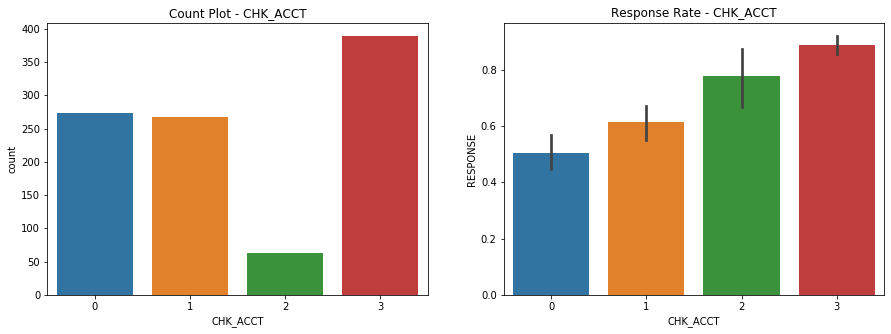

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('CHK_ACCT', data = credit_data, ax = ax[0]) # 예금계좌 현황
ax[0].set_title('Count Plot - CHK_ACCT')
sns.barplot(x = 'CHK_ACCT', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 예금계좌에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - CHK_ACCT')

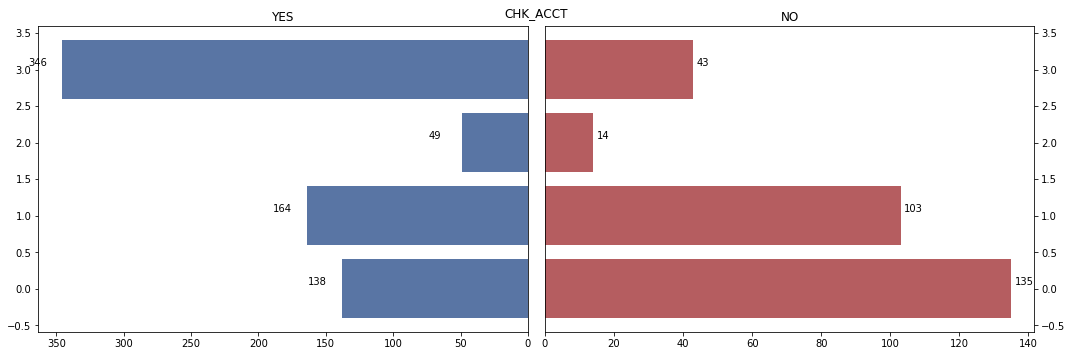

In [37]:
visualize_distribution('CHK_ACCT')

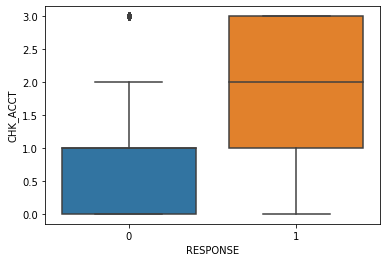

In [38]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'CHK_ACCT')

###  DURATION (대출기간)

In [39]:
# DURATION : Duration of credit in months; Numerical

In [40]:
credit_data['DURATION'].value_counts(dropna = False)

24      182
12      178
18      113
36       80
6        75
15       62
9        49
48       47
30       40
21       30
10       28
27       13
60       12
42       11
11        9
20        8
8         7
4         6
7         5
39        5
14        4
13        4
45        4
28        3
33        3
16        2
22        2
54        2
145       1
5         1
1124      1
40        1
72        1
47        1
26        1
148       1
Name: DURATION, dtype: int64

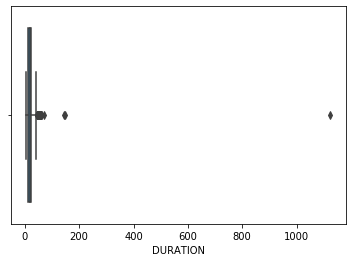

In [41]:
sns.boxplot('DURATION', data = credit_data) # 대출기간이 1124개월 --> 이상치로 간주하고 삭제

In [42]:
credit_data = credit_data[credit_data.DURATION != 1124]

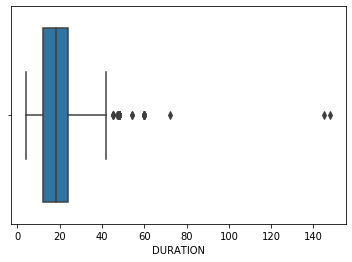

In [43]:
sns.boxplot('DURATION', data = credit_data)

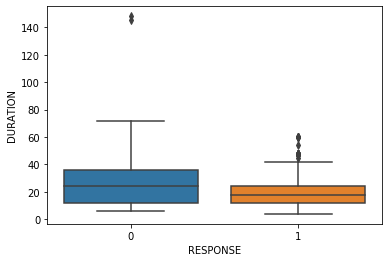

In [44]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'DURATION')

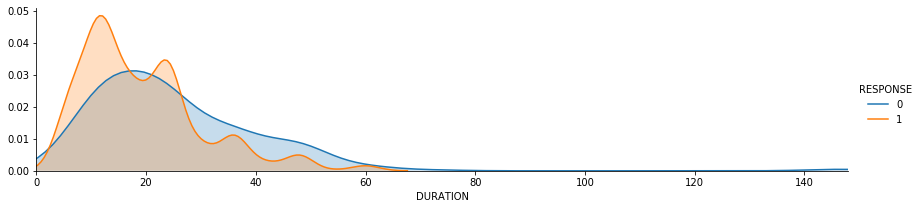

In [45]:
# 대출기간에 따른 신용평가(DURATION) >>> 
facet = sns.FacetGrid(credit_data, hue = 'RESPONSE', aspect = 4)
facet.map(sns.kdeplot, 'DURATION', shade = True)
facet.set(xlim = (0, credit_data['DURATION'].max()))
facet.add_legend()

In [46]:
# month를 year로 변환해서 1년 단위로 DURATION 데이터 분할; 3년 이상부터는 데이터 수가 적어서 모두 3년으로 취급
credit_data.loc[ credit_data['DURATION'] <= 12, 'DURATION'] = 0, 
credit_data.loc[(credit_data['DURATION'] > 12) & (credit_data['DURATION'] <= 24), 'DURATION'] = 1,
credit_data.loc[(credit_data['DURATION'] > 24) & (credit_data['DURATION'] <= 36), 'DURATION'] = 2,
credit_data.loc[ credit_data['DURATION'] > 36, 'DURATION'] = 3

credit_data['DURATION_yr'] = credit_data['DURATION'] # DURATION_yr이라는 새로운 변수열 생성
credit_data = credit_data.drop(['DURATION'], axis = 1) # 기존의 DURATION 변수열은 삭제

C:\Users\Liv\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Liv\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [47]:
credit_data['DURATION_yr'].value_counts(dropna = False)

1    407
0    358
2    140
3     86
Name: DURATION_yr, dtype: int64

Text(0.5, 1.0, 'Response Rate - DURATION')

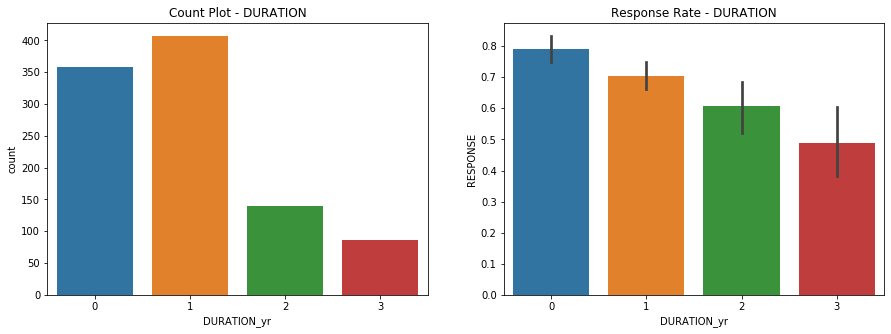

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('DURATION_yr', data = credit_data, ax = ax[0]) # 대출기간 현황
ax[0].set_title('Count Plot - DURATION')
sns.barplot(x = 'DURATION_yr', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 대출기간에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - DURATION')

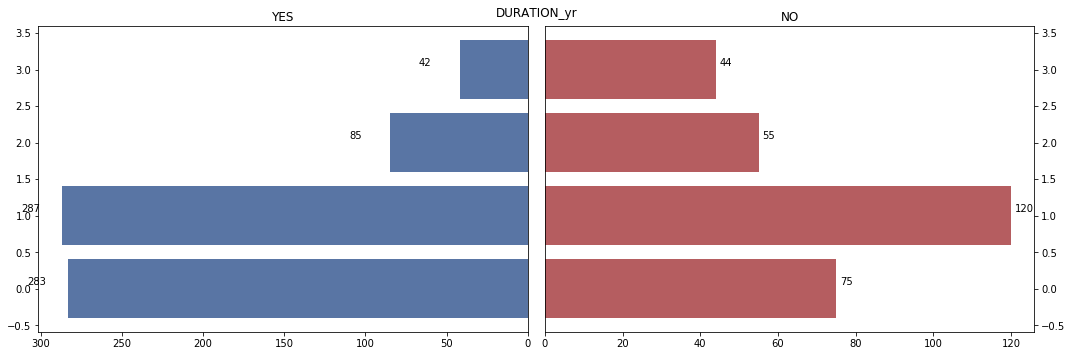

In [49]:
visualize_distribution('DURATION_yr')

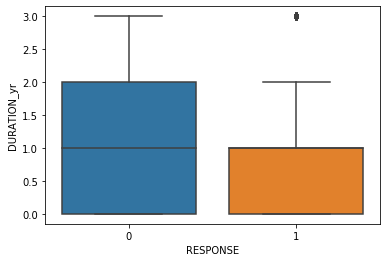

In [50]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'DURATION_yr')

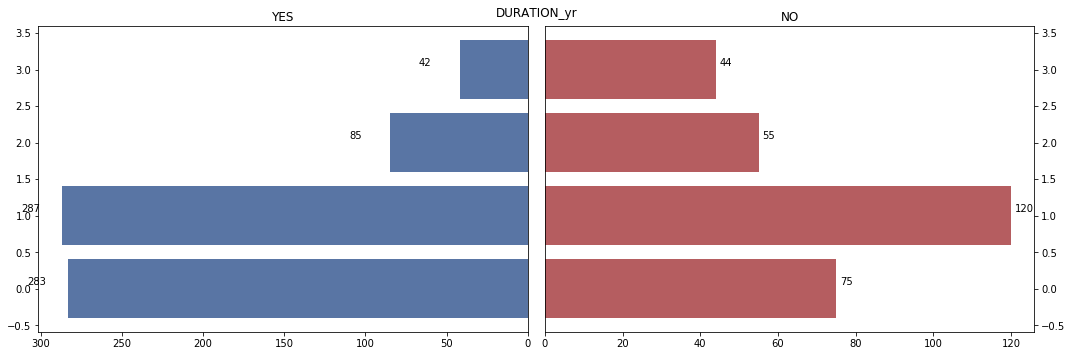

In [51]:
visualize_distribution('DURATION_yr')

### HISTORY (신용 경력)

In [52]:
# HISTORY : Credit history; Categorical 
# 0: no credits taken
# 1: all credits at this bank paid back duly  
# 2: existing credits paid back duly till now  
# 3: delay in paying off in the past   
# 4: critical account   

In [53]:
credit_data['HISTORY'].value_counts(dropna = False)

2    526
4    291
3     87
1     48
0     39
Name: HISTORY, dtype: int64

Text(0.5, 1.0, 'Response Rate - HISTORY')

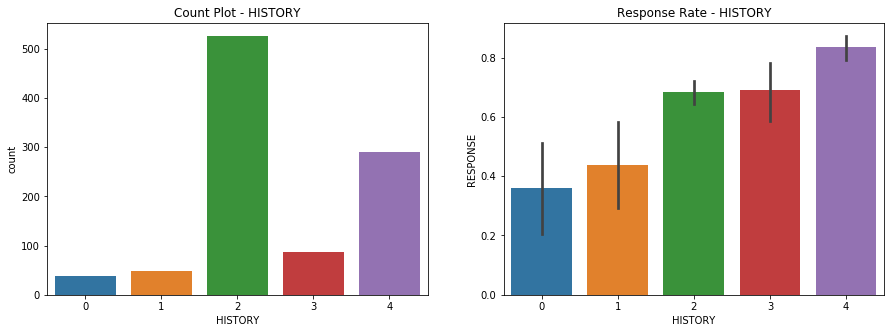

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('HISTORY', data = credit_data, ax = ax[0]) # 신용 경력 현황
ax[0].set_title('Count Plot - HISTORY')
sns.barplot(x = 'HISTORY', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 신용 경력에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - HISTORY')

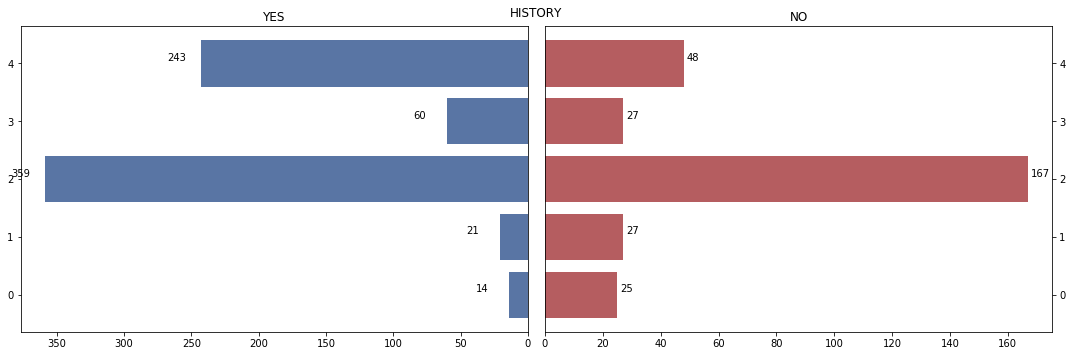

In [55]:
visualize_distribution('HISTORY')

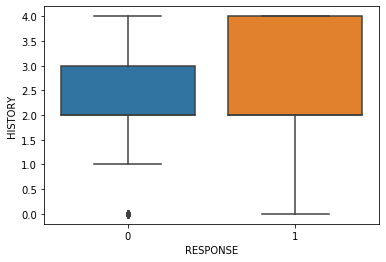

In [56]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'HISTORY')

### Purpose of Credit (NEW_CAR, USED_CAR, FURNITURE, RADIO/TV, EDUCATION, RETRAINING) (구입 목적)

In [57]:
# Purpose of credit; Binary (0: No, 1: Yes)

Text(0.5, 1.0, 'Count Plot - RETRAINING')

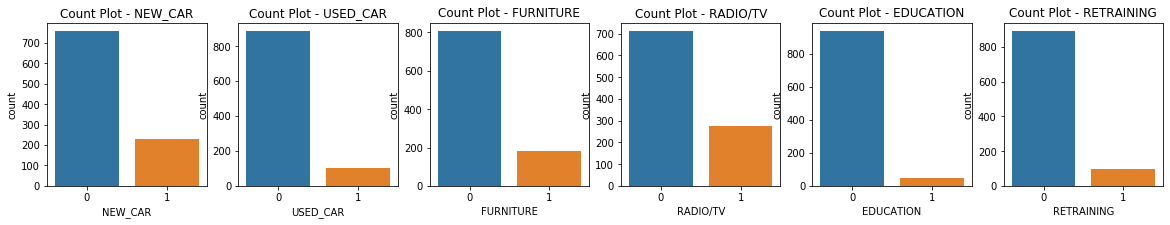

In [58]:
fig, ax = plt.subplots(1, 6, figsize=(20, 3))
sns.countplot('NEW_CAR', data = credit_data, ax = ax[0]) # 신차 구입 목적 여부
ax[0].set_title('Count Plot - NEW_CAR')
sns.countplot('USED_CAR', data = credit_data, ax = ax[1]) # 중고차 구입 목적 여부
ax[1].set_title('Count Plot - USED_CAR')
sns.countplot('FURNITURE', data = credit_data, ax = ax[2]) # 가구 구입 목적 여부
ax[2].set_title('Count Plot - FURNITURE')
sns.countplot('RADIO/TV', data = credit_data, ax = ax[3]) # 라디오/TV 구입 목적 여부
ax[3].set_title('Count Plot - RADIO/TV')
sns.countplot('EDUCATION', data = credit_data, ax = ax[4]) # 교육 목적 여부
ax[4].set_title('Count Plot - EDUCATION')
sns.countplot('RETRAINING', data = credit_data, ax = ax[5]) # 재교육 목적 여부
ax[5].set_title('Count Plot - RETRAINING')

Text(0.5, 1.0, 'Response Rate - RETRAINING')

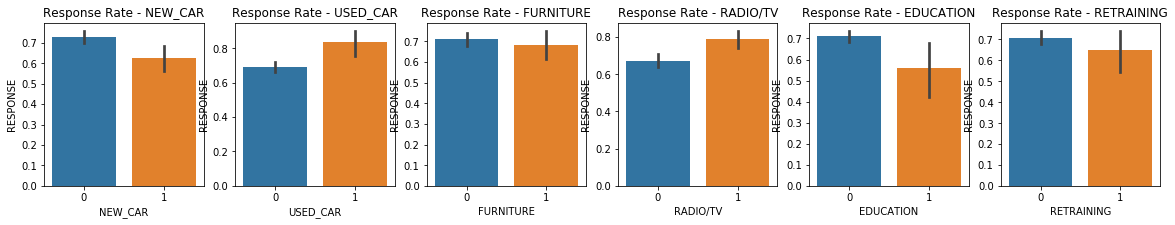

In [59]:
fig, ax = plt.subplots(1, 6, figsize=(20, 3))
sns.barplot(x = 'NEW_CAR', y = 'RESPONSE', data = credit_data, ax = ax[0]) # 신차 구입 목적 여부에 따른 신용평가(RESPONSE) 
ax[0].set_title('Response Rate - NEW_CAR')
sns.barplot(x = 'USED_CAR', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 중고차 구입 목적 여부에 따른 신용평가(RESPONSE) 
ax[1].set_title('Response Rate - USED_CAR')
sns.barplot(x = 'FURNITURE', y = 'RESPONSE', data = credit_data, ax = ax[2]) # 가구 구입 목적 여부에 따른 신용평가(RESPONSE) 
ax[2].set_title('Response Rate - FURNITURE')
sns.barplot(x = 'RADIO/TV', y = 'RESPONSE', data = credit_data, ax = ax[3]) # 라디오/TV 구입 목적 여부에 따른 신용평가(RESPONSE) 
ax[3].set_title('Response Rate - RADIO/TV')
sns.barplot(x = 'EDUCATION', y = 'RESPONSE', data = credit_data, ax = ax[4]) # 교육 목적 여부에 따른 신용평가(RESPONSE) 
ax[4].set_title('Response Rate - EDUCATION')
sns.barplot(x = 'RETRAINING', y = 'RESPONSE', data = credit_data, ax = ax[5]) # 재교육 목적 여부에 따른 신용평가(RESPONSE) 
ax[5].set_title('Response Rate - RETRAINING')

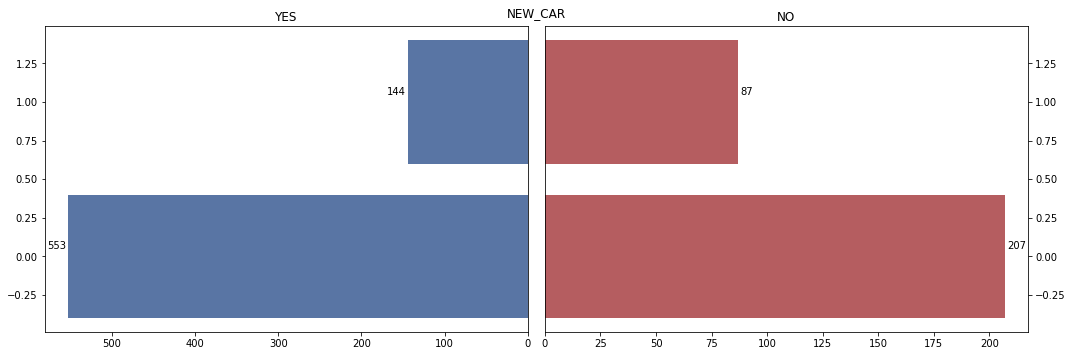

In [60]:
visualize_distribution('NEW_CAR')

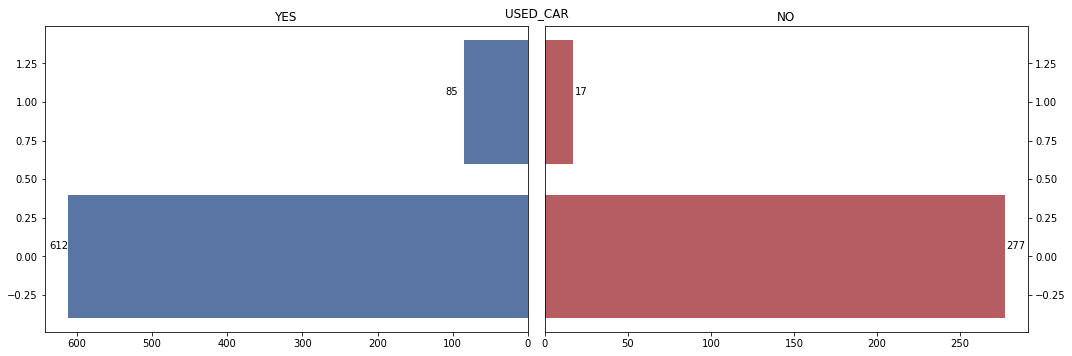

In [61]:
visualize_distribution('USED_CAR')

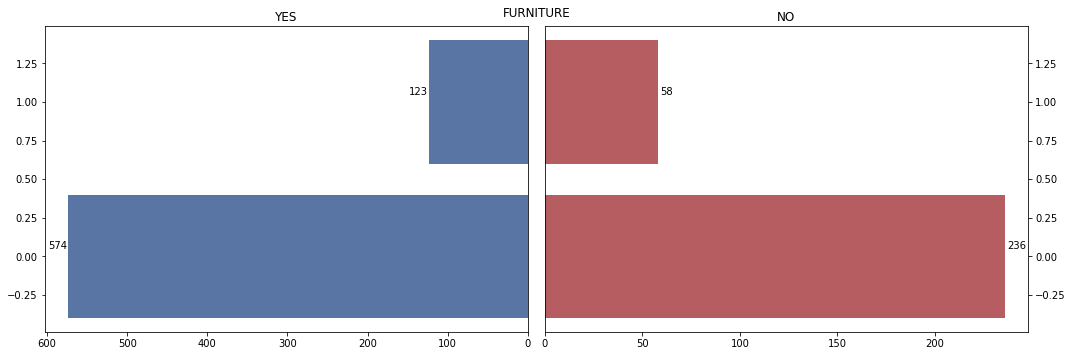

In [62]:
visualize_distribution('FURNITURE')

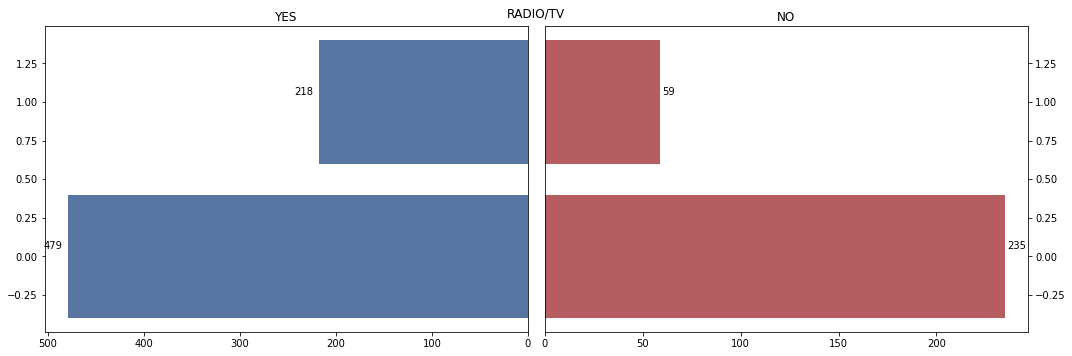

In [63]:
visualize_distribution('RADIO/TV')

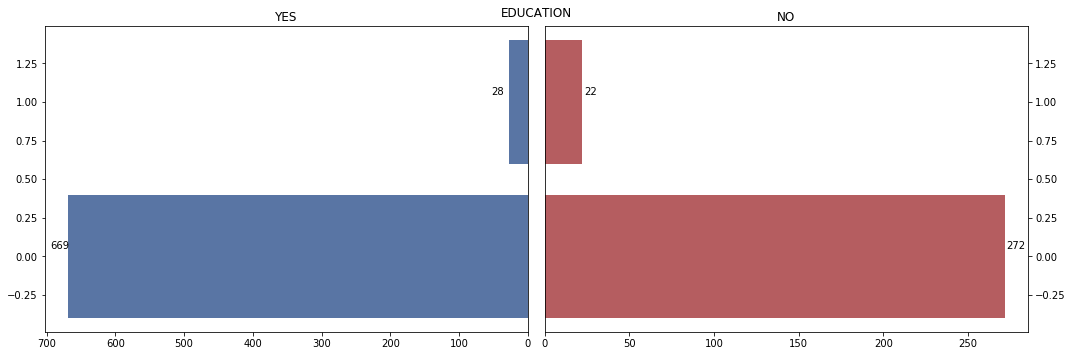

In [64]:
visualize_distribution('EDUCATION')

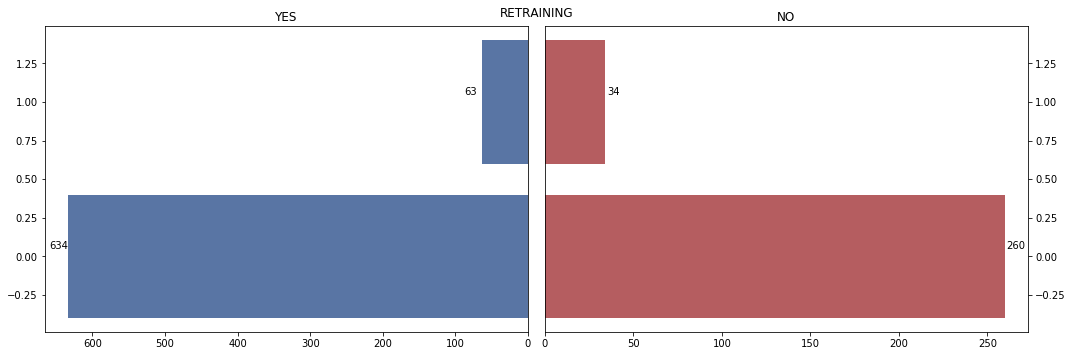

In [65]:
visualize_distribution('RETRAINING')

### AMOUNT (대출액)

In [66]:
# AMOUNT : Credit amount; Numerical

In [67]:
credit_data['AMOUNT'].value_counts(dropna = False)

1262      3
1478      3
1393      3
1258      3
1275      3
         ..
1346      1
1345      1
111935    1
7485      1
2051      1
Name: AMOUNT, Length: 915, dtype: int64

In [68]:
credit_data['AMOUNT'].describe()

count       991.000000
mean       4495.702321
std       15630.053155
min           7.000000
25%        1365.000000
50%        2320.000000
75%        4013.000000
max      336948.000000
Name: AMOUNT, dtype: float64

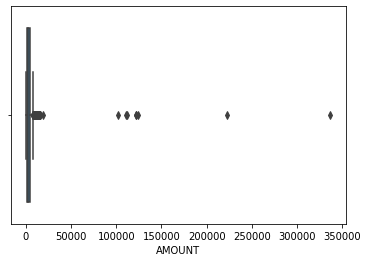

In [69]:
sns.boxplot('AMOUNT', data = credit_data)

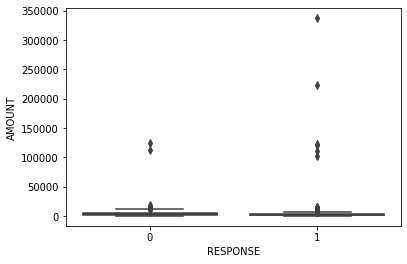

In [70]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'AMOUNT')

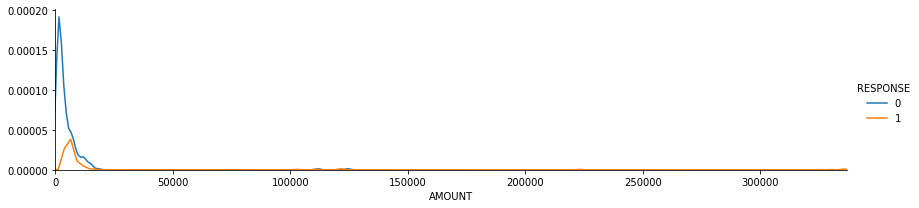

In [71]:
# 대출액에 따른 신용평가(RESPONSE) 
facet = sns.FacetGrid(credit_data, hue = 'RESPONSE', aspect = 4)
facet.map(sns.kdeplot, 'AMOUNT')
facet.set(xlim = (0, credit_data['AMOUNT'].max()))
facet.add_legend()

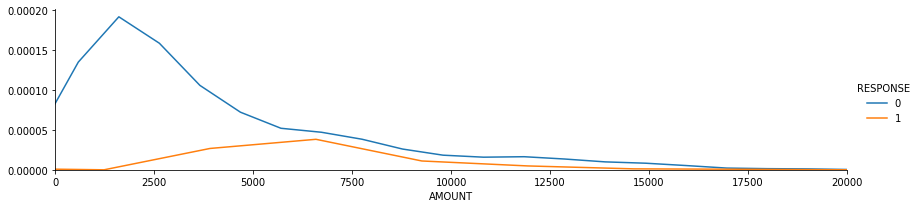

In [72]:
facet = sns.FacetGrid(credit_data, hue = 'RESPONSE', aspect = 4)
facet.map(sns.kdeplot, 'AMOUNT')
facet.set(xlim = (0, credit_data['AMOUNT'].max()))
facet.add_legend()
plt.xlim(0,20000) # 대출액이 0 ~ 20000 사이인 경우만 확대해서 보기
plt.style.use('ggplot')

In [73]:
# AMOUNT를 1,000 단위로 데이터 분할; 5,000 이상부터는 데이터 수가 적어서 모두 5,000으로 취급
credit_data.loc[ credit_data['AMOUNT'] <= 1000, 'AMOUNT'] = 0, 
credit_data.loc[(credit_data['AMOUNT'] > 1000) & (credit_data['AMOUNT'] <= 2000), 'AMOUNT'] = 1,
credit_data.loc[(credit_data['AMOUNT'] > 2000) & (credit_data['AMOUNT'] <= 3000), 'AMOUNT'] = 2,
credit_data.loc[(credit_data['AMOUNT'] > 3000) & (credit_data['AMOUNT'] <= 4000), 'AMOUNT'] = 3,
credit_data.loc[(credit_data['AMOUNT'] > 4000) & (credit_data['AMOUNT'] <= 5000), 'AMOUNT'] = 4,
credit_data.loc[ credit_data['AMOUNT'] > 5000, 'AMOUNT'] = 5

credit_data['AMOUNT_cat'] = credit_data['AMOUNT'] # AMOUNT_cat이라는 새로운 변수열 생성
credit_data = credit_data.drop(['AMOUNT'], axis = 1) # 기존의 AMOUNT 변수열은 삭제

Text(0.5, 1.0, 'Response Rate - AMOUNT')

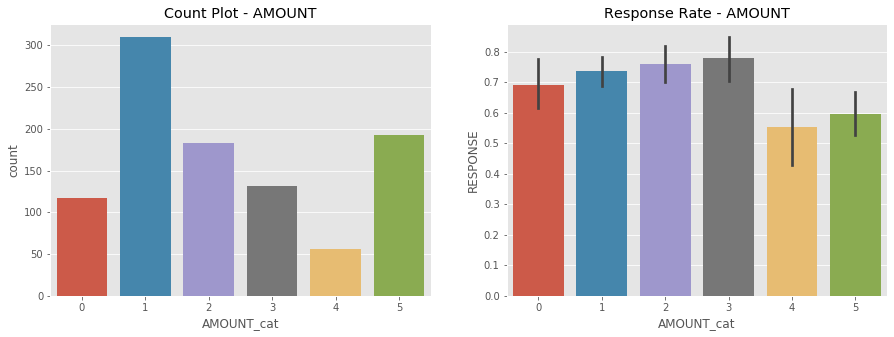

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('AMOUNT_cat', data = credit_data, ax = ax[0]) # 대출액 현황
ax[0].set_title('Count Plot - AMOUNT')
sns.barplot(x = 'AMOUNT_cat', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 대출액에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - AMOUNT')

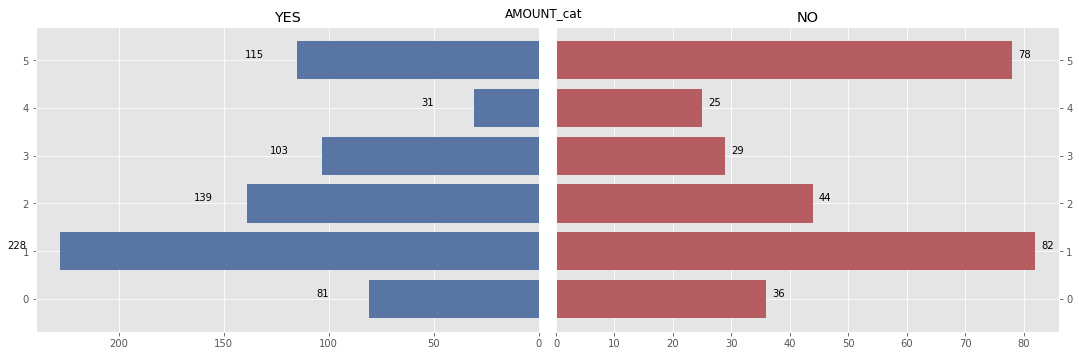

In [75]:
visualize_distribution('AMOUNT_cat')

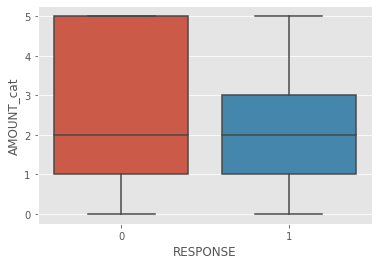

In [76]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'AMOUNT_cat')

### SAV_ACCT (저축액)

In [77]:
# SAV_ACCT : Average balance in savings account; Categorical 
# 0: < 100 DM 
# 1: 100 <= ... < 500 DM 
# 2: 500 <= ... < 1000 DM 
# 3: => 1000 DM 
# 4: unknown / no savings account 

In [78]:
credit_data['SAV_ACCT'].value_counts(dropna = False)

0    598
4    182
1    100
2     63
3     48
Name: SAV_ACCT, dtype: int64

Text(0.5, 1.0, 'Response Rate - SAV_ACCT')

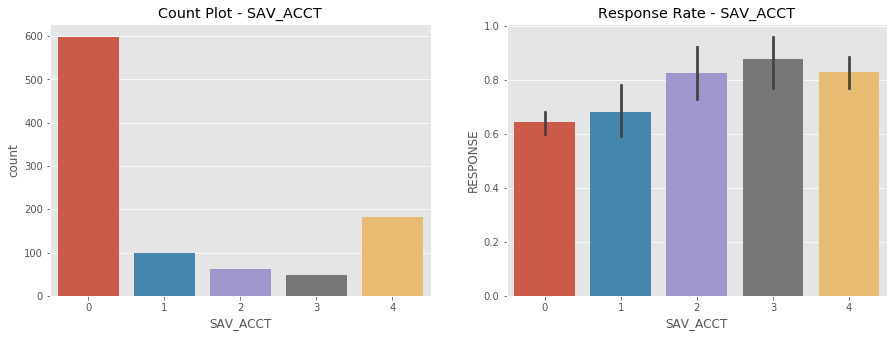

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('SAV_ACCT', data = credit_data, ax = ax[0]) # 저축액 현황
ax[0].set_title('Count Plot - SAV_ACCT')
sns.barplot(x = 'SAV_ACCT', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 저축액에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - SAV_ACCT')

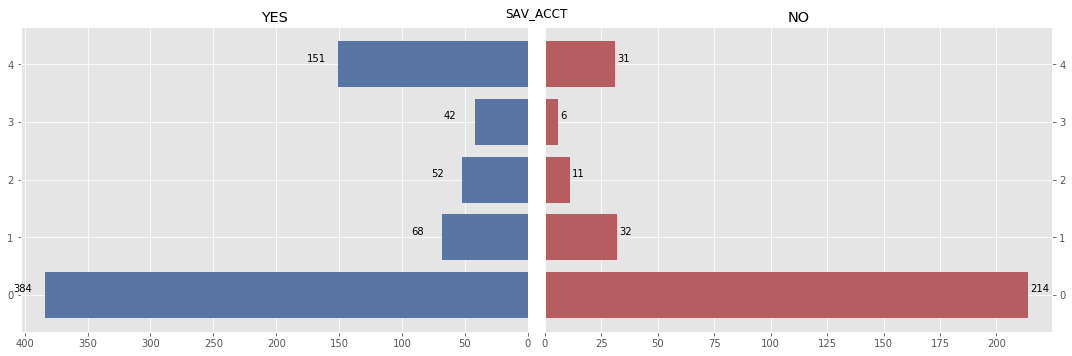

In [80]:
visualize_distribution('SAV_ACCT')

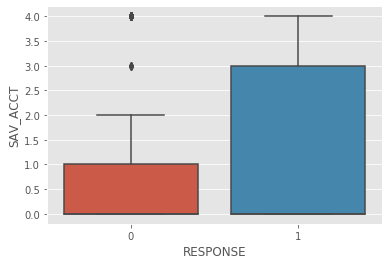

In [81]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'SAV_ACCT')

### INSTALL_RATE (가처분소득 대비 납입비율)

In [82]:
# INSTALL_RATE : Installment rate as % of disposable income; Numerical

In [83]:
credit_data['INSTALL_RATE'].value_counts(dropna = False)

4    471
2    230
3    155
1    135
Name: INSTALL_RATE, dtype: int64

Text(0.5, 1.0, 'Response Rate - INSTALL_RATE')

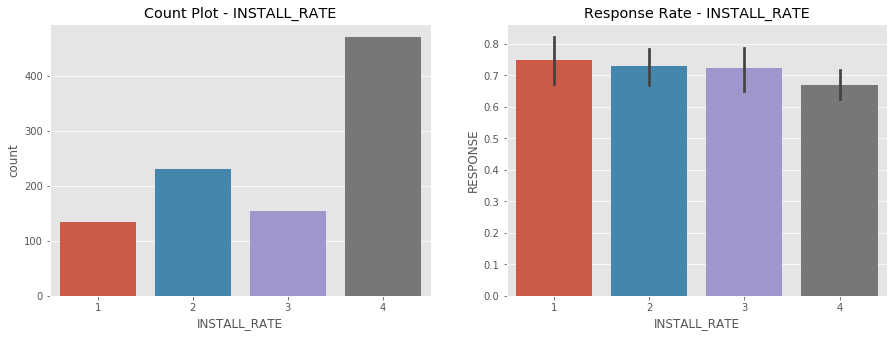

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('INSTALL_RATE', data = credit_data, ax = ax[0]) # 가처분소득 대비 납입비율 현황
ax[0].set_title('Count Plot - INSTALL_RATE')
sns.barplot(x = 'INSTALL_RATE', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 가처분소득 대비 납입비율에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - INSTALL_RATE')

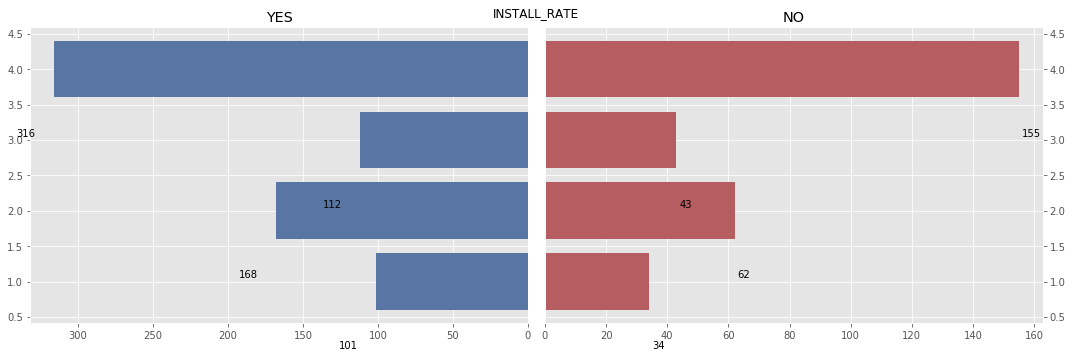

In [85]:
visualize_distribution('INSTALL_RATE')

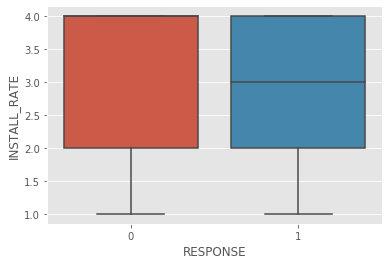

In [86]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'INSTALL_RATE')

### Marriage (MALE_DIV, MALE_SINGLE, MALE_MAR_WID) (남성고객 결혼 여부 정보)

In [87]:
# MALE_DIV : Applicant is male and divorced; Binary 
# MALE_SINGLE : Applicant is male and single; Binary 
# MALE_MAR_WID : Applicant is male and married or a widower; Binary 
# 0: No, 1: Yes

Text(0.5, 1.0, 'Count Plot - MALE_MAR_or_WID')

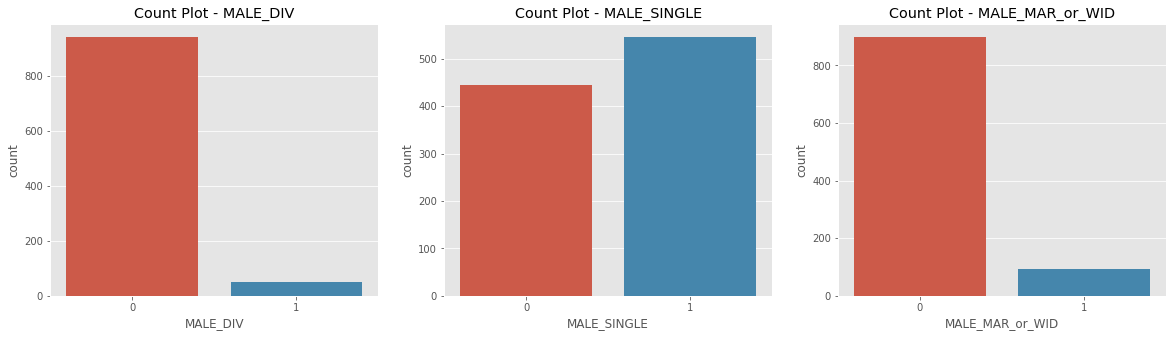

In [88]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot('MALE_DIV', data = credit_data, ax = ax[0]) # 이혼남 여부
ax[0].set_title('Count Plot - MALE_DIV')
sns.countplot('MALE_SINGLE', data = credit_data, ax = ax[1]) # 미혼남 여부
ax[1].set_title('Count Plot - MALE_SINGLE')
sns.countplot('MALE_MAR_or_WID', data = credit_data, ax = ax[2]) # 기혼남 여부
ax[2].set_title('Count Plot - MALE_MAR_or_WID')

Text(0.5, 1.0, 'Response Rate - MALE_MAR_or_WID')

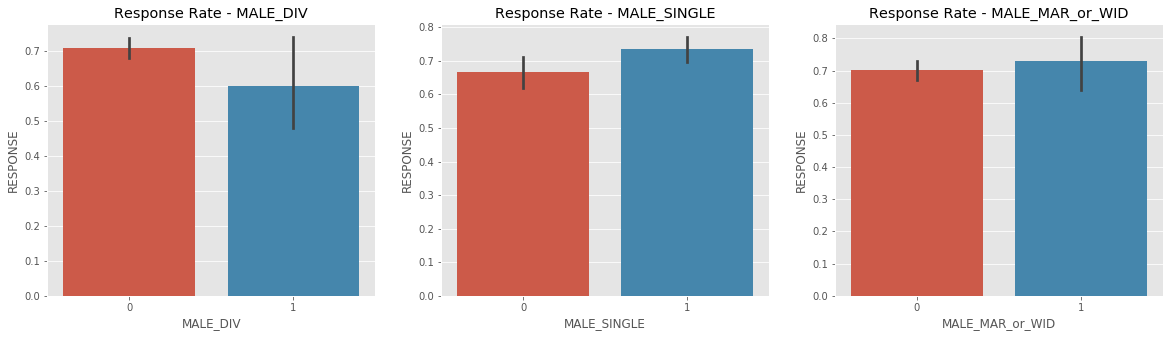

In [89]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(x = 'MALE_DIV', y = 'RESPONSE', data = credit_data, ax = ax[0]) # 이혼남 여부에 따른 신용평가(RESPONSE) 
ax[0].set_title('Response Rate - MALE_DIV')
sns.barplot(x = 'MALE_SINGLE', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 미혼남 여부에 따른 신용평가(RESPONSE) 
ax[1].set_title('Response Rate - MALE_SINGLE')
sns.barplot(x = 'MALE_MAR_or_WID', y = 'RESPONSE', data = credit_data, ax = ax[2]) # 기혼남 여부에 따른 신용평가(RESPONSE) 
ax[2].set_title('Response Rate - MALE_MAR_or_WID')

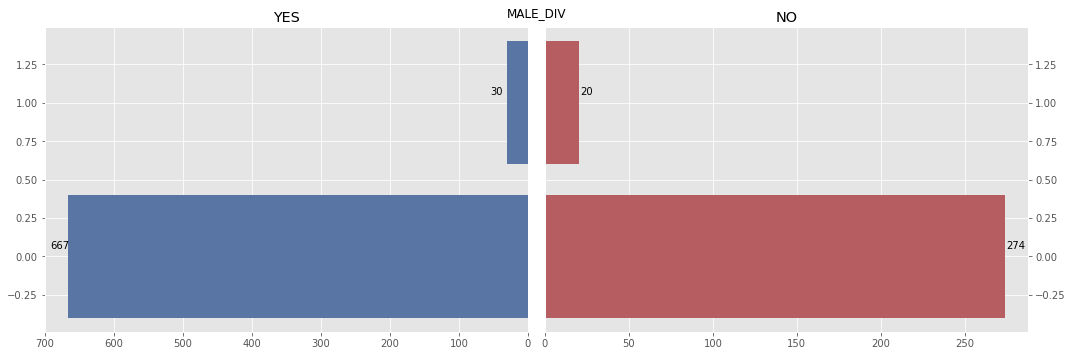

In [90]:
visualize_distribution('MALE_DIV')

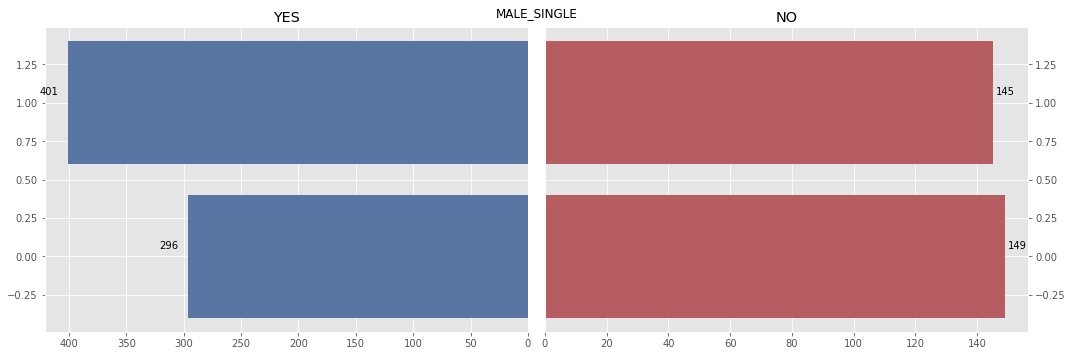

In [91]:
visualize_distribution('MALE_SINGLE')

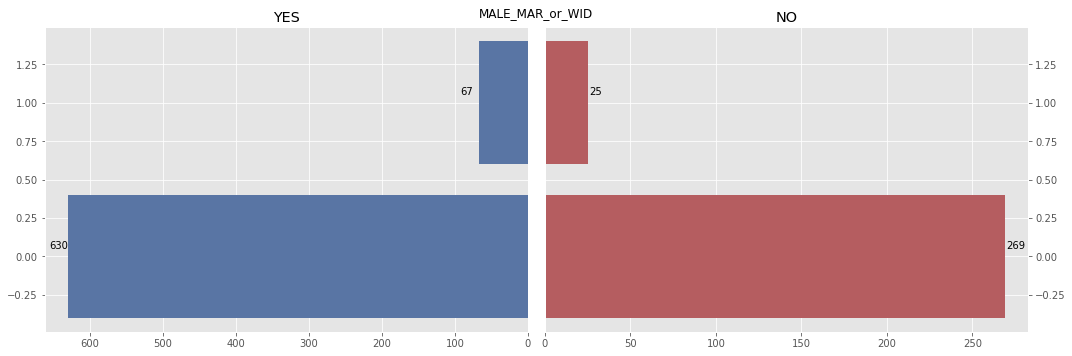

In [92]:
visualize_distribution('MALE_MAR_or_WID')

### CO-APPLICANT, GUARANTOR (공동 신청인, 보증인 유무)

In [93]:
# CO-APPLICANT : Application has a co-applicant; Binary 
# GUARANTOR : Applicant has a guarantor; Binary  
# 0: No, 1: Yes 

Text(0.5, 1.0, 'Count Plot - GUARANTOR')

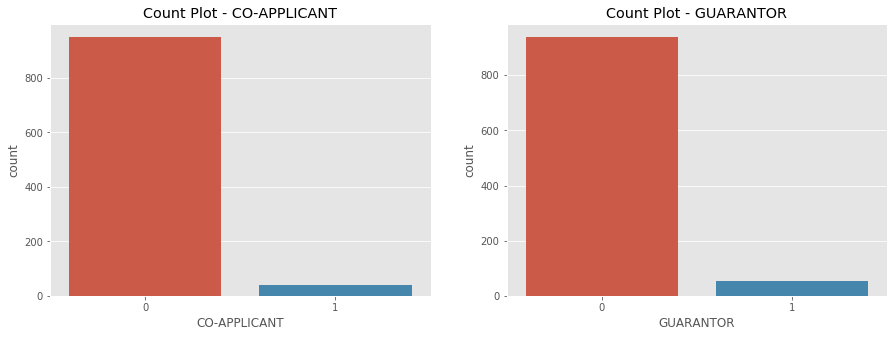

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('CO-APPLICANT', data = credit_data, ax = ax[0]) # 공동 신청인 유무
ax[0].set_title('Count Plot - CO-APPLICANT')
sns.countplot('GUARANTOR', data = credit_data, ax = ax[1]) # 보증인 유무
ax[1].set_title('Count Plot - GUARANTOR')

Text(0.5, 1.0, 'Response Rate - GUARANTOR')

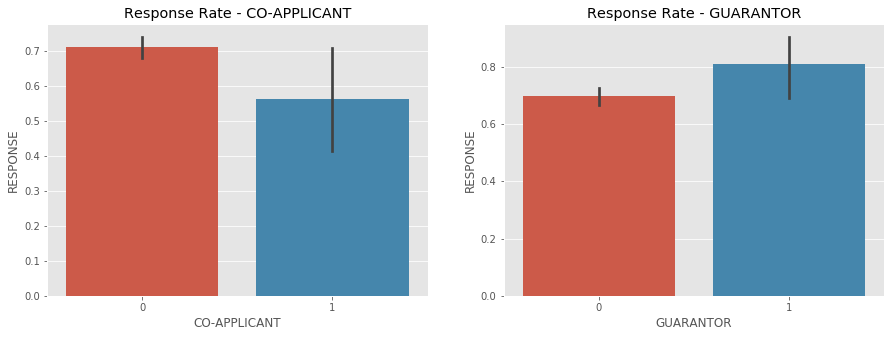

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x = 'CO-APPLICANT', y = 'RESPONSE', data = credit_data, ax = ax[0]) # 공동 신청인 유무에 따른 신용평가(RESPONSE) 
ax[0].set_title('Response Rate - CO-APPLICANT')
sns.barplot(x = 'GUARANTOR', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 보증인 유무에 따른 신용평가(RESPONSE) 
ax[1].set_title('Response Rate - GUARANTOR')

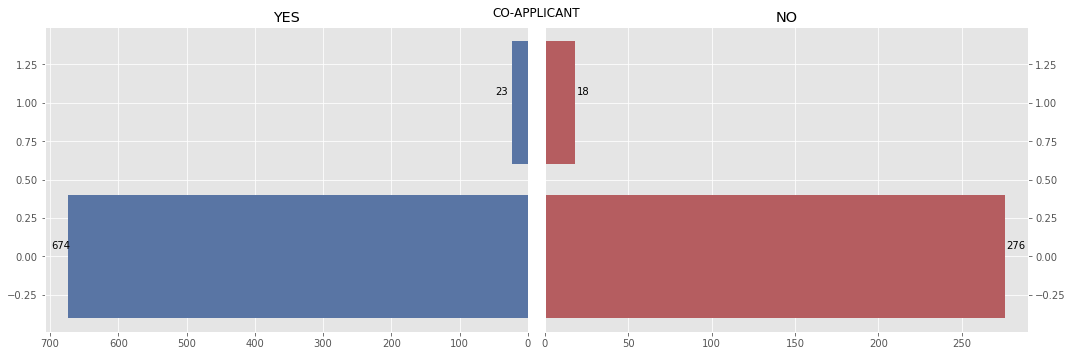

In [96]:
visualize_distribution('CO-APPLICANT')

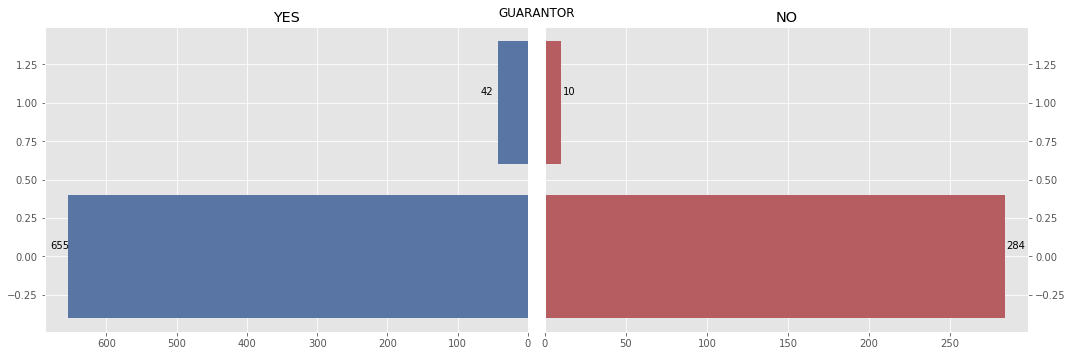

In [97]:
visualize_distribution('GUARANTOR')

### PRESENT_RESIDENT (거주기간)

In [98]:
# PRESENT_RESIDENT : Present resident since; Categorical 
# 1: <= 1 year 
# 2: < … <= 2 years 
# 3: < … <= 3 years 
# 4: > 4 years 

In [99]:
credit_data['PRESENT_RESIDENT'].value_counts(dropna = False)

4    409
2    304
3    148
1    130
Name: PRESENT_RESIDENT, dtype: int64

Text(0.5, 1.0, 'Response Rate - PRESENT_RESIDENT')

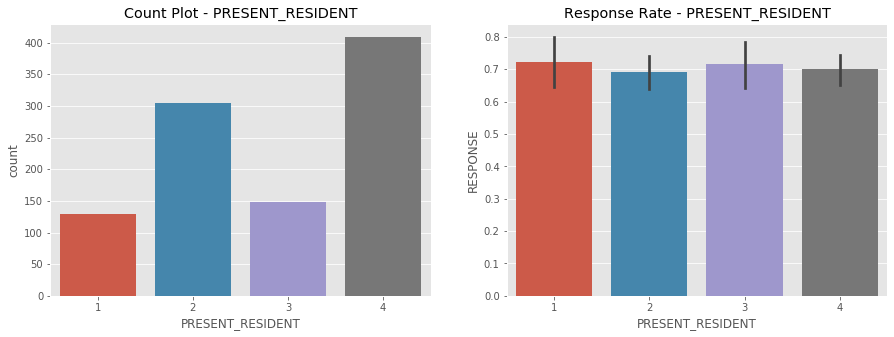

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('PRESENT_RESIDENT', data = credit_data, ax = ax[0]) # 거주기간 현황
ax[0].set_title('Count Plot - PRESENT_RESIDENT')
sns.barplot(x = 'PRESENT_RESIDENT', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 거주기간에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - PRESENT_RESIDENT')

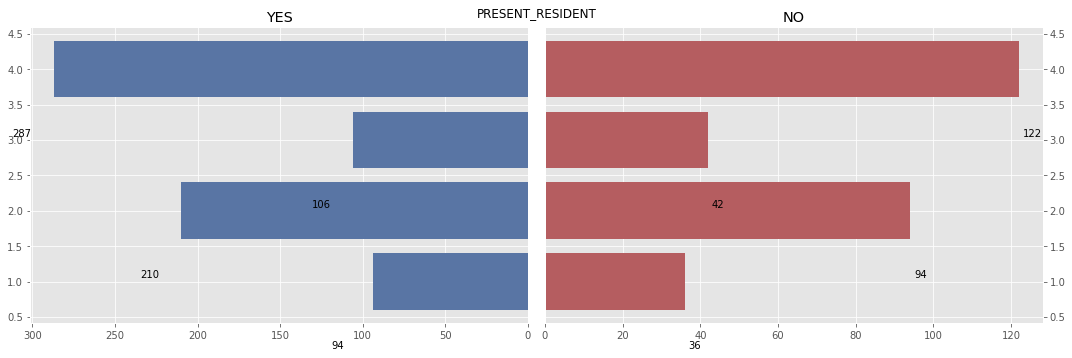

In [101]:
visualize_distribution('PRESENT_RESIDENT')

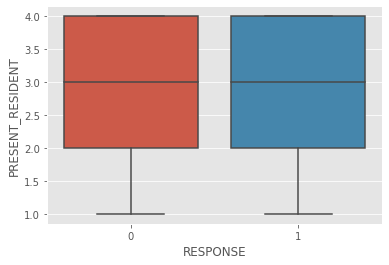

In [102]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'PRESENT_RESIDENT')

### REAL_ESTATE, PROP_UNKN_NONE (부동산, 재산 소유 여부)

In [103]:
# REAL_ESTATE : Applicant owns real estate; Binary   
# PROP_UNKN_NONE : Applicant owns no property (or unknown); Binary
# 0: No, 1: Yes

Text(0.5, 1.0, 'Count Plot - PROP_UNKN_NONE')

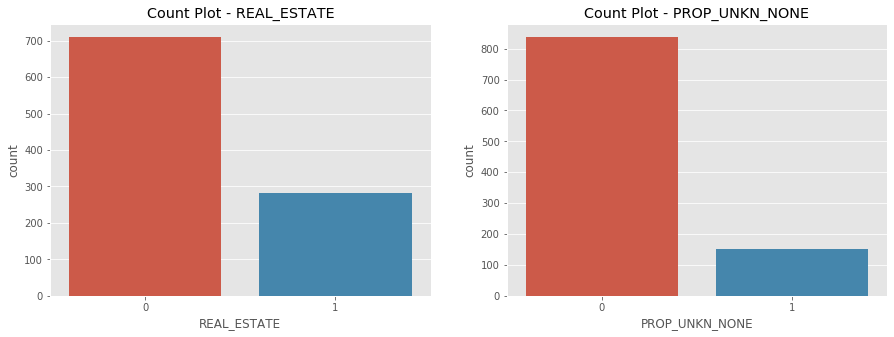

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('REAL_ESTATE', data = credit_data, ax = ax[0]) # 부동산 유무
ax[0].set_title('Count Plot - REAL_ESTATE')
sns.countplot('PROP_UNKN_NONE', data = credit_data, ax = ax[1]) # 재산 유무
ax[1].set_title('Count Plot - PROP_UNKN_NONE')

Text(0.5, 1.0, 'Response Rate - PROP_UNKN_NONE')

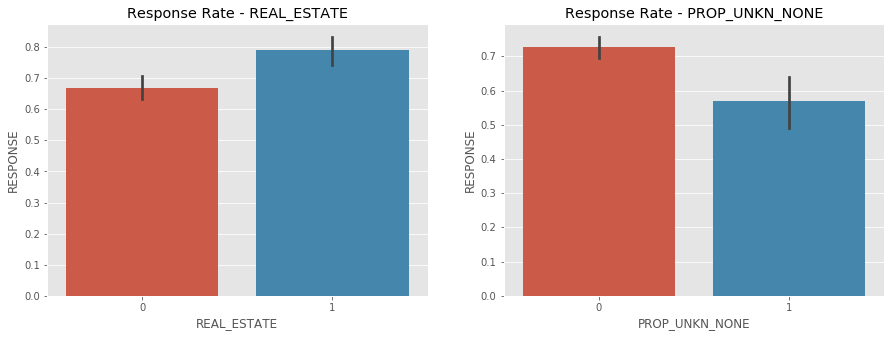

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x = 'REAL_ESTATE', y = 'RESPONSE', data = credit_data, ax = ax[0]) # 부동산 유무에 따른 신용평가(RESPONSE) 
ax[0].set_title('Response Rate - REAL_ESTATE')
sns.barplot(x = 'PROP_UNKN_NONE', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 재산 유무에 따른 신용평가(RESPONSE) 
ax[1].set_title('Response Rate - PROP_UNKN_NONE')

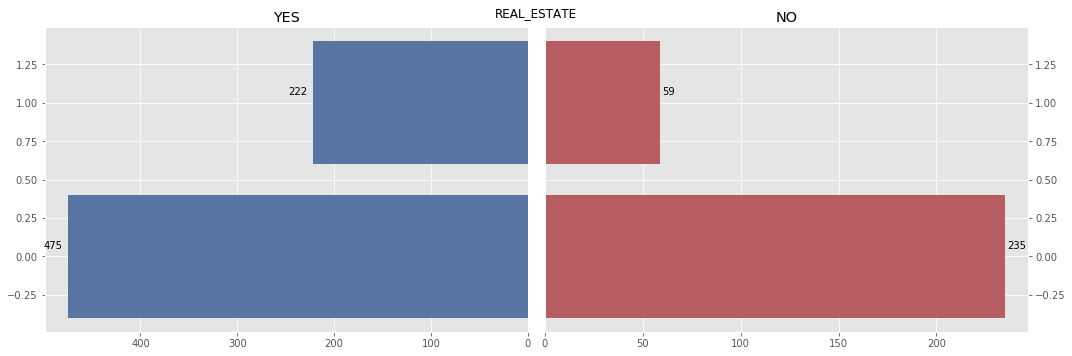

In [106]:
visualize_distribution('REAL_ESTATE')

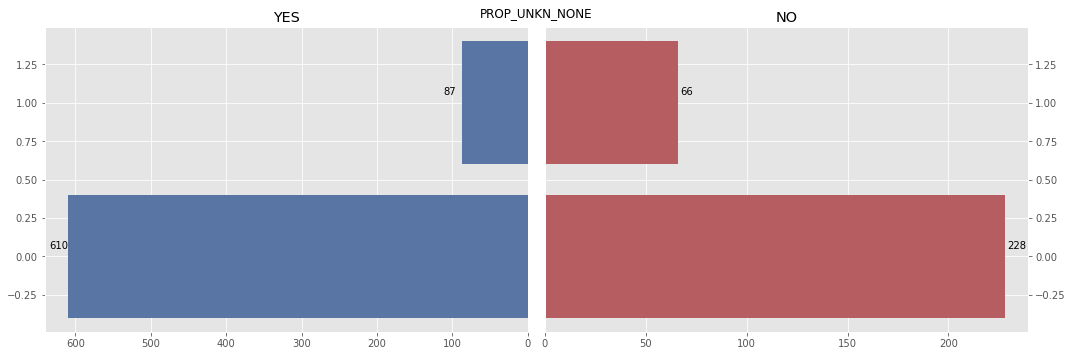

In [107]:
visualize_distribution('PROP_UNKN_NONE')

### OTHER_INSTALL (별도 분납계획)

In [108]:
#  OTHER_INSTALL : Applicant has other installment plan credit; Binary (0: No, 1: Yes)

Text(0.5, 1.0, 'Response Rate - OTHER_INSTALL')

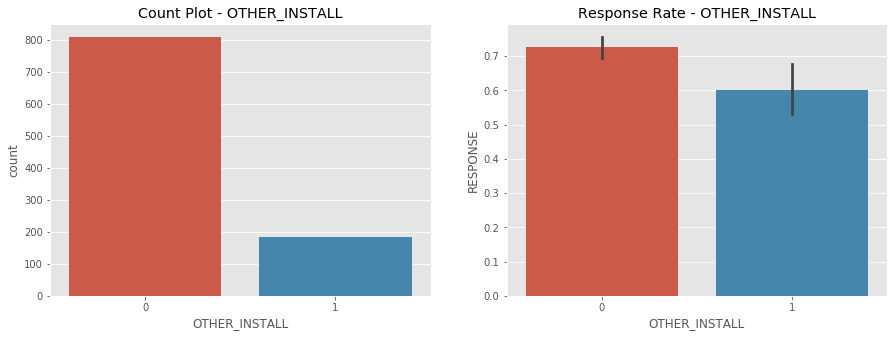

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('OTHER_INSTALL', data = credit_data, ax = ax[0]) # 별도 분납계획 현황
ax[0].set_title('Count Plot - OTHER_INSTALL')
sns.barplot(x = 'OTHER_INSTALL', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 별도 분납계획에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - OTHER_INSTALL')

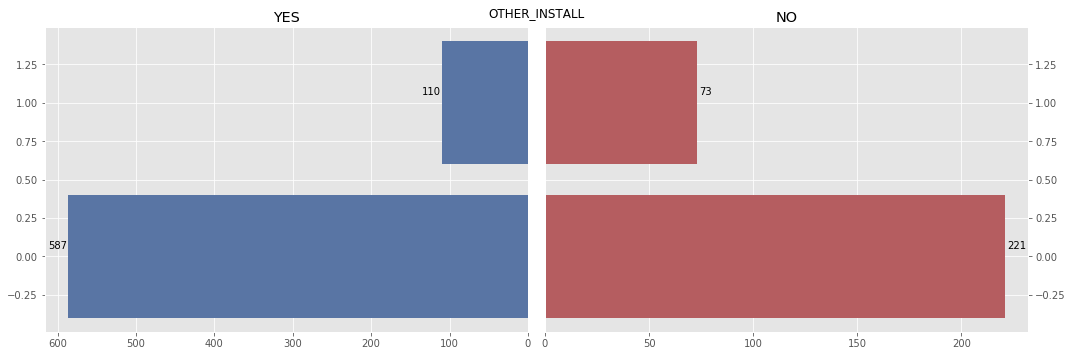

In [110]:
visualize_distribution('OTHER_INSTALL')

### Housing (RENT, OWN_RES) (렌트, 집 소유 여부)

In [111]:
# RENT : Applicant rents; Binary
# OWN_RES : Applicant owns residence; Binary  
# 0: No, 1: Yes 

Text(0.5, 1.0, 'Count Plot - OWN_RES')

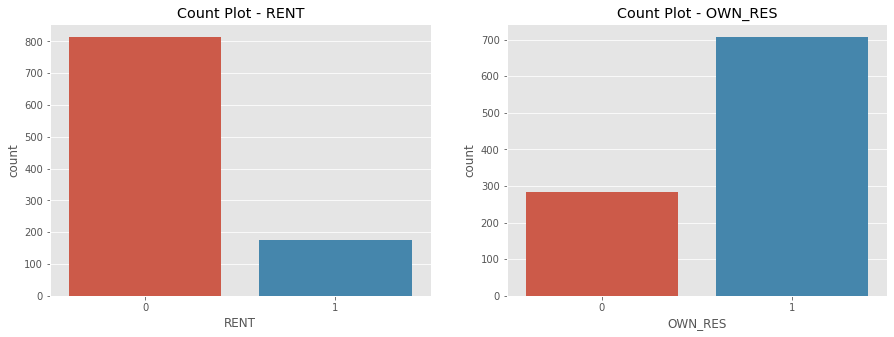

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('RENT', data = credit_data, ax = ax[0]) # 렌트 여부
ax[0].set_title('Count Plot - RENT')
sns.countplot('OWN_RES', data = credit_data, ax = ax[1]) # 집 소유 여부
ax[1].set_title('Count Plot - OWN_RES')

Text(0.5, 1.0, 'Response Rate - OWN_RES')

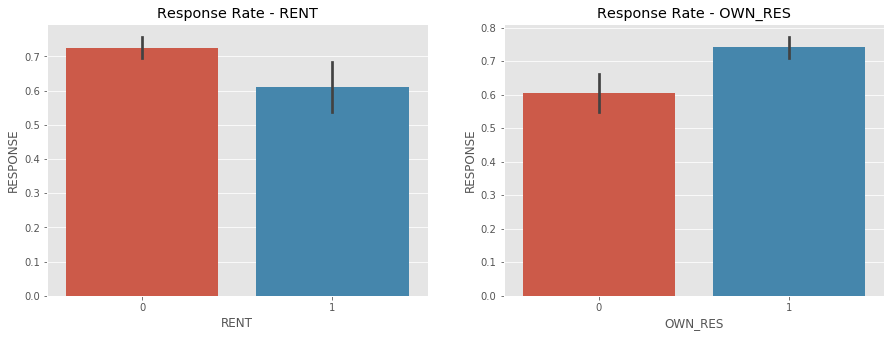

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x = 'RENT', y = 'RESPONSE', data = credit_data, ax = ax[0]) # 렌트 여부에 따른 신용평가(RESPONSE) 
ax[0].set_title('Response Rate - RENT')
sns.barplot(x = 'OWN_RES', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 집 소유 여부에 따른 신용평가(RESPONSE) 
ax[1].set_title('Response Rate - OWN_RES')

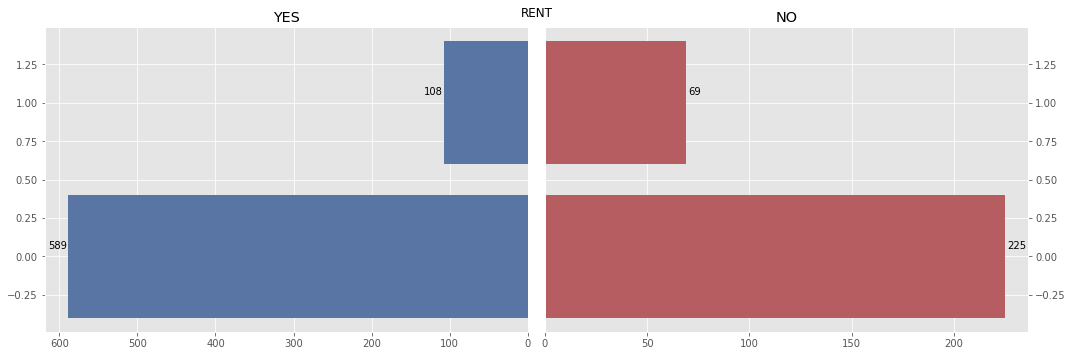

In [114]:
visualize_distribution('RENT')

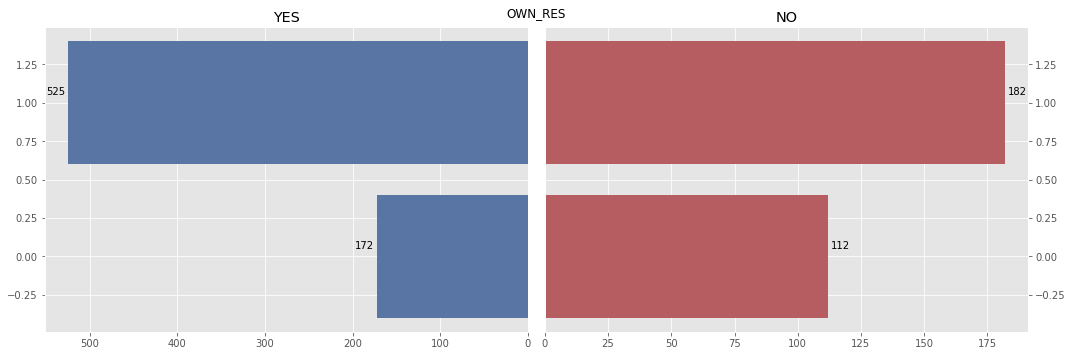

In [115]:
visualize_distribution('OWN_RES')

### NUM_CREDITS (해당 은행 대출 수)

In [116]:
# NUM_CREDITS : Number of existing credits at this bank; Numerical

Text(0.5, 1.0, 'Response Rate - NUM_CREDITS')

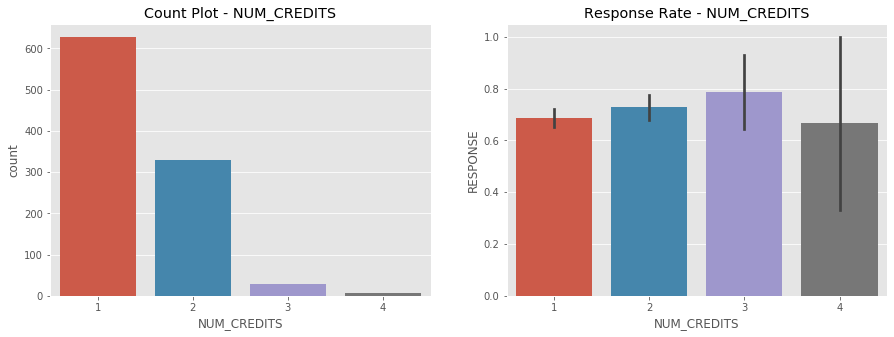

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('NUM_CREDITS', data = credit_data, ax = ax[0]) # 해당 은행 대출 수 현황
ax[0].set_title('Count Plot - NUM_CREDITS')
sns.barplot(x = 'NUM_CREDITS', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 해당 은행 대출 수에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - NUM_CREDITS')

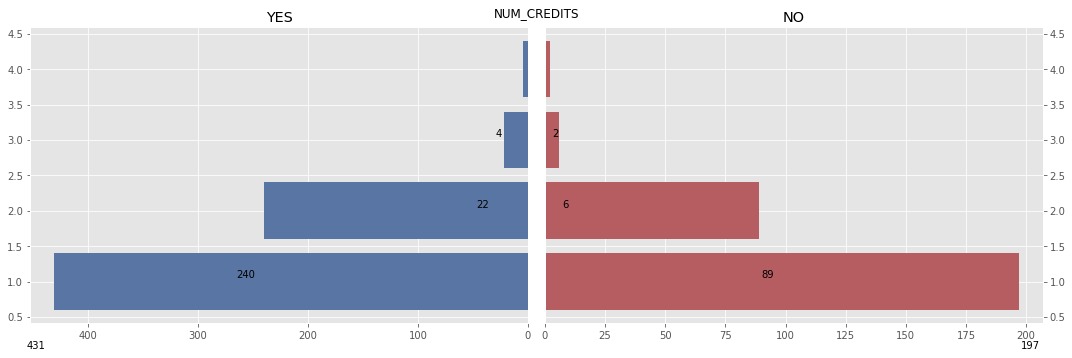

In [118]:
visualize_distribution('NUM_CREDITS')

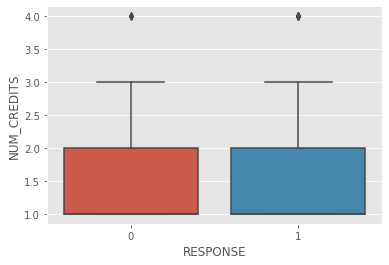

In [119]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'NUM_CREDITS')

### JOB (직업)

In [120]:
# JOB : Nature of job; Categorical 
# 0: unemployed / unskilled - non-resident 
# 1: unskilled - resident
# 2: skilled employee / official 
# 3: management / self-employed / highly qualified employee / officer 

Text(0.5, 1.0, 'Response Rate - JOB')

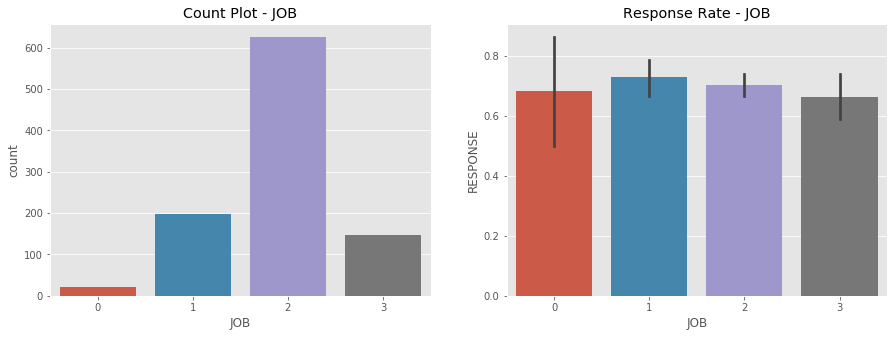

In [121]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('JOB', data = credit_data, ax = ax[0]) # 해당 은행 대출 수 현황
ax[0].set_title('Count Plot - JOB')
sns.barplot(x = 'JOB', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 해당 은행 대출 수에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - JOB')

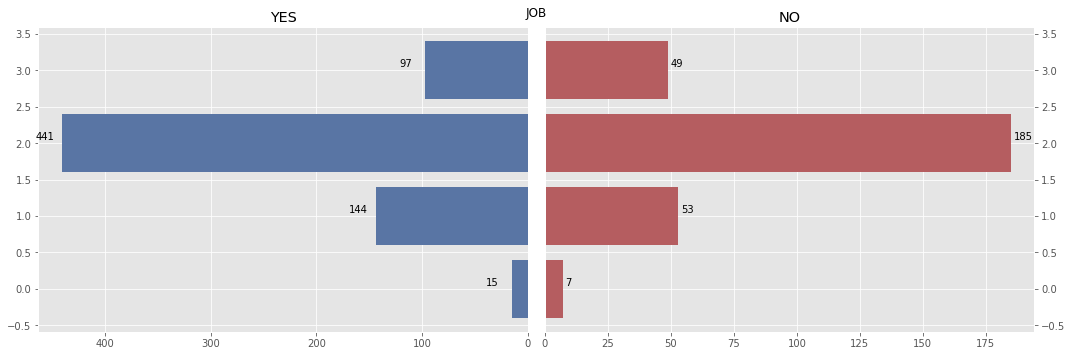

In [122]:
visualize_distribution('JOB')

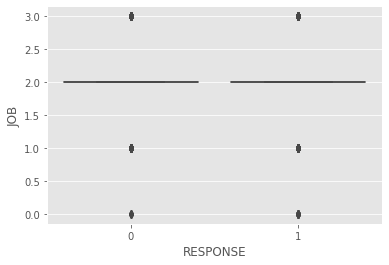

In [123]:
sns.boxplot(data = credit_data, x = 'RESPONSE', y = 'JOB')

### NUM_DEPENDENTS (부양하는 사람 수? 보증인 수?)

In [124]:
# NUM_DEPENDENTS : Number of people for whom liable to provide maintenance; Numerical 

Text(0.5, 1.0, 'Response Rate - NUM_DEPENDENTS')

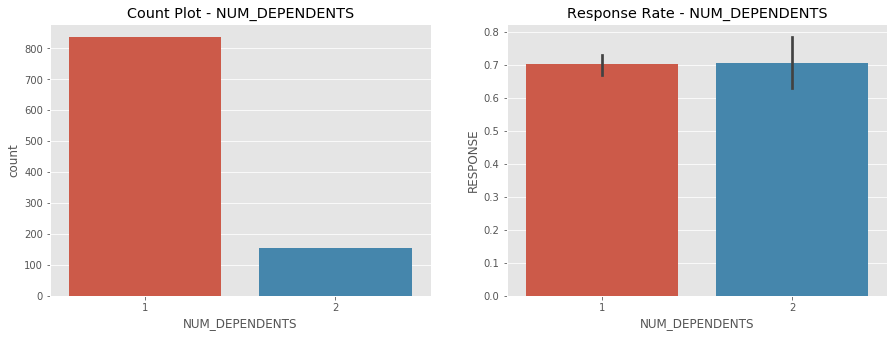

In [125]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('NUM_DEPENDENTS', data = credit_data, ax = ax[0]) 
ax[0].set_title('Count Plot - NUM_DEPENDENTS')
sns.barplot(x = 'NUM_DEPENDENTS', y = 'RESPONSE', data = credit_data, ax = ax[1]) 
ax[1].set_title('Response Rate - NUM_DEPENDENTS')

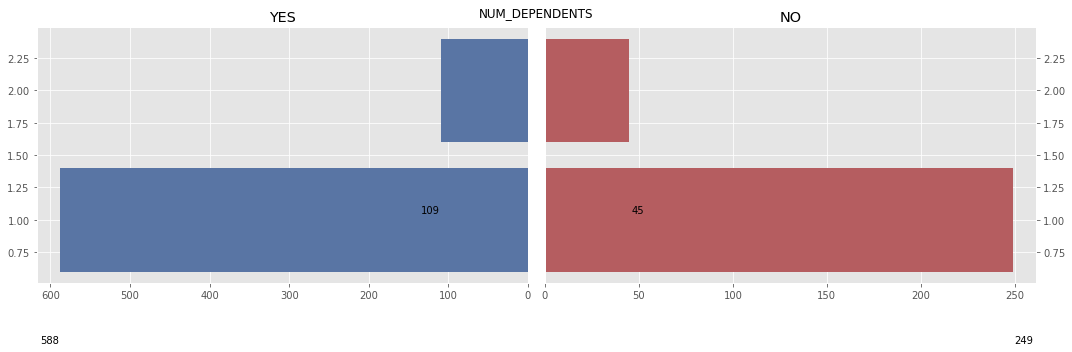

In [126]:
visualize_distribution('NUM_DEPENDENTS')

### TELEPHONE (본인 명의 전화 소유 여부)

In [127]:
# TELEPHONE : Applicant has phone in his or her name; Binary (0: No, 1: Yes)

Text(0.5, 1.0, 'Response Rate - TELEPHONE')

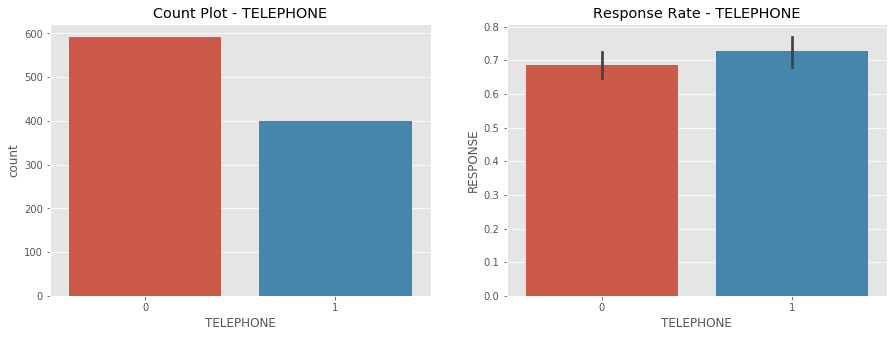

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('TELEPHONE', data = credit_data, ax = ax[0]) # 본인 명의의 전화 소유 여부 현황
ax[0].set_title('Count Plot - TELEPHONE')
sns.barplot(x = 'TELEPHONE', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 본인 명의의 전화 소유 여부에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - TELEPHONE')

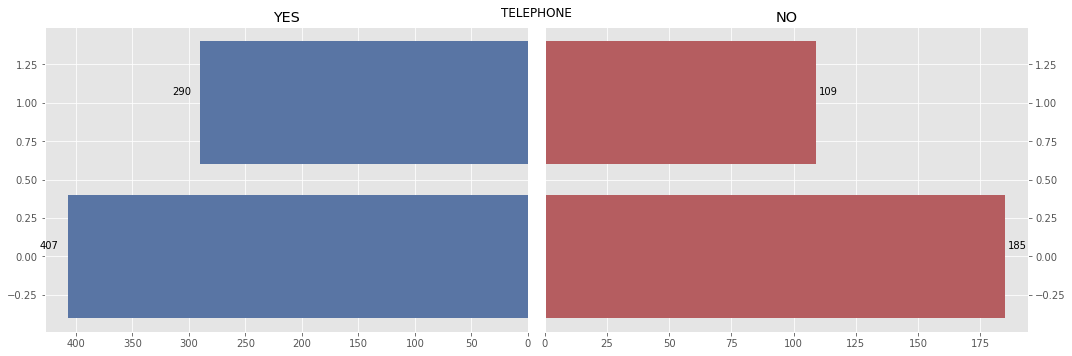

In [129]:
visualize_distribution('TELEPHONE')

### FOREIGN (외국인 근로자 여부)

In [130]:
# FOREIGNER : Foreign worker; Binary (0: No, 1: Yes) 

Text(0.5, 1.0, 'Response Rate - FOREIGN')

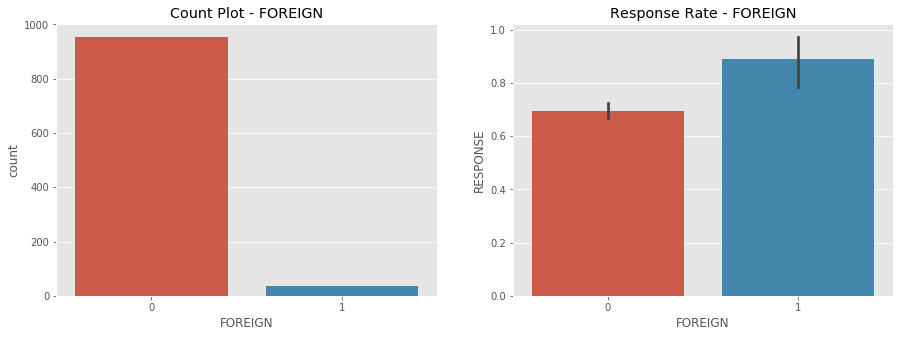

In [131]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot('FOREIGN', data = credit_data, ax = ax[0]) # 외국인 근로자 여부 현황
ax[0].set_title('Count Plot - FOREIGN')
sns.barplot(x = 'FOREIGN', y = 'RESPONSE', data = credit_data, ax = ax[1]) # 외국인 근로자 여부에 따른 신용평가(RESPONSE)
ax[1].set_title('Response Rate - FOREIGN')

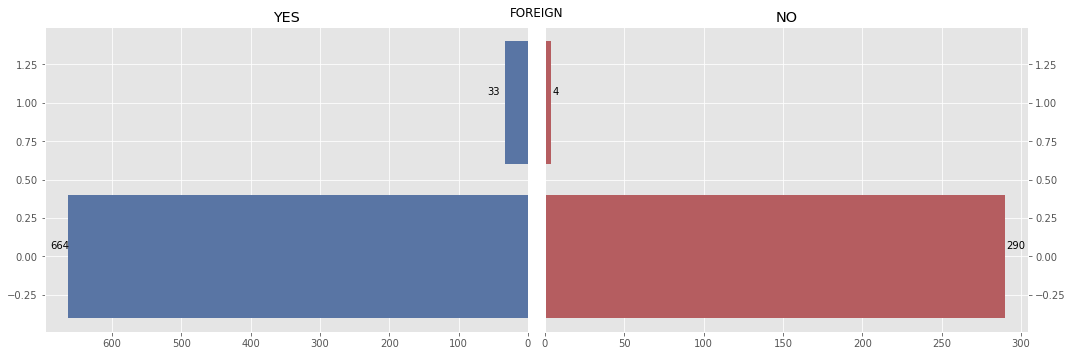

In [132]:
visualize_distribution('FOREIGN')

## 전체 변수들 간 상관관계

In [133]:
credit_data

,OBS,CHK_ACCT,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,SAV_ACCT,...,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE,AGE_cat,DURATION_yr,AMOUNT_cat
0,1,0,4,0,0,0,1,0,0,4,...,1,2,2,1,1,0,1,3,0,1
1,2,1,2,0,0,0,1,0,0,0,...,1,1,2,1,0,0,0,0,3,5
2,3,3,4,0,0,0,0,1,0,0,...,1,1,1,2,0,0,1,2,0,2
3,4,0,2,0,0,1,0,0,0,0,...,0,1,2,2,0,0,1,2,3,5
4,5,0,3,1,0,0,0,0,0,0,...,0,2,2,2,0,0,0,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,2,0,0,1,0,0,0,0,...,1,1,1,1,0,0,1,1,0,1
996,997,0,2,0,1,0,0,0,0,0,...,1,1,3,1,1,0,1,2,2,3
997,998,3,2,0,0,0,1,0,0,0,...,1,1,2,1,0,0,1,2,0,0
998,999,0,2,0,0,0,1,0,0,0,...,0,1,2,1,1,0,0,0,3,1


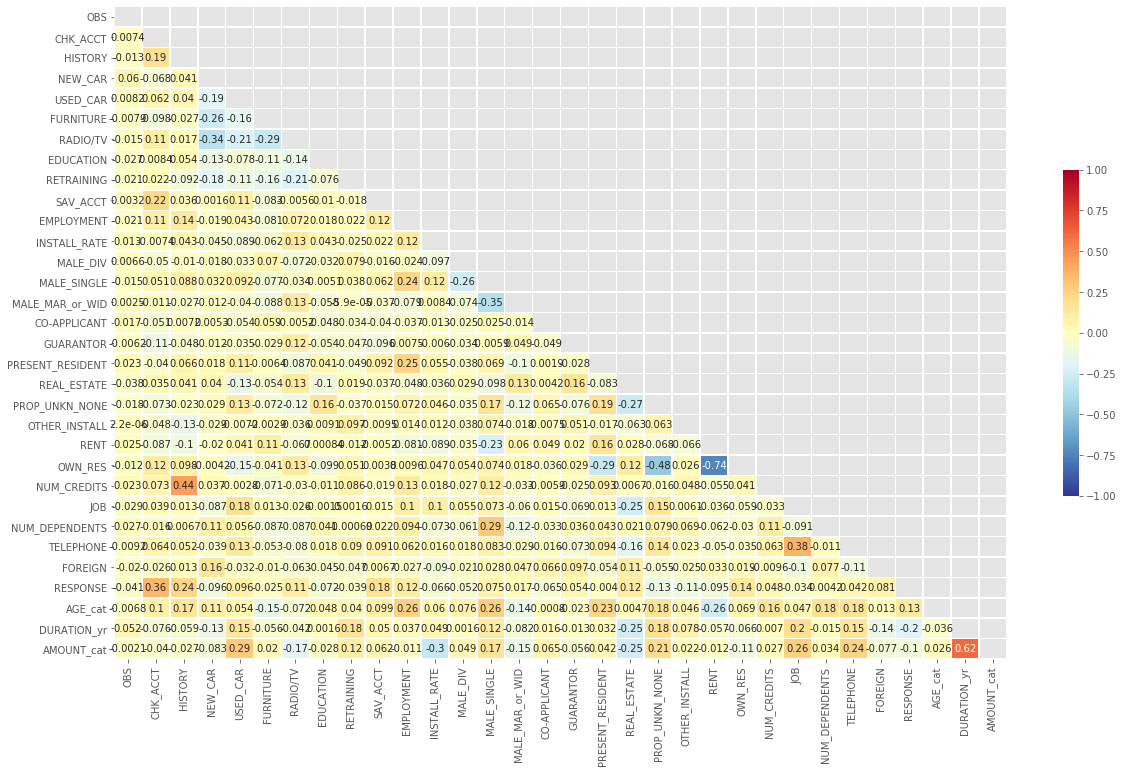

In [134]:
plt.figure(figsize = (20,12))
mask = np.zeros_like(credit_data.corr(), dtype = np.bool) 
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(data = credit_data.corr(), annot = True, mask = mask, linewidths = .5, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, vmin = -1, vmax = 1)

## 정규화

In [135]:
y_credit_df = credit_data['RESPONSE']
x_credit_df = credit_data.drop('RESPONSE', axis = 1)

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Standard Scaler로 표준화하기 >>> 평균 0, 분산 1로 변환
x_credit_scaled = scaler.fit_transform(x_credit_df)

In [137]:
credit_data = pd.DataFrame(data = x_credit_scaled, columns = x_credit_df.columns)
y_credit_df.index = credit_data.index
credit_data = pd.concat([y_credit_df, credit_data], axis = 1)

In [138]:
credit_data # 제대로 스케일링이 되었는지 확인

,RESPONSE,OBS,CHK_ACCT,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,...,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,AGE_cat,DURATION_yr,AMOUNT_cat
0,1,-1.741225,-1.252933,1.343595,-0.551314,-0.338727,-0.472712,1.605496,-0.230510,-0.329395,...,-0.46631,0.633796,1.026480,0.146922,-0.428941,1.218076,-0.196937,2.118139,-1.035834,-0.763438
1,0,-1.737756,-0.456999,-0.506999,-0.551314,-0.338727,-0.472712,1.605496,-0.230510,-0.329395,...,-0.46631,0.633796,-0.703523,0.146922,-0.428941,-0.820967,-0.196937,-1.558001,2.222933,1.619451
2,1,-1.734287,1.134868,1.343595,-0.551314,-0.338727,-0.472712,-0.622860,4.338202,-0.329395,...,-0.46631,0.633796,-0.703523,-1.385703,2.331323,-0.820967,-0.196937,0.892759,-1.035834,-0.167716
3,1,-1.730819,-1.252933,-0.506999,-0.551314,-0.338727,2.115452,-0.622860,-0.230510,-0.329395,...,-0.46631,-1.577795,-0.703523,0.146922,2.331323,-0.820967,-0.196937,0.892759,2.222933,1.619451
4,0,-1.727350,-1.252933,0.418298,1.813848,-0.338727,-0.472712,-0.622860,-0.230510,-0.329395,...,-0.46631,-1.577795,1.026480,0.146922,2.331323,-0.820967,-0.196937,0.892759,0.050422,1.023729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,1,1.710167,1.134868,-0.506999,-0.551314,-0.338727,2.115452,-0.622860,-0.230510,-0.329395,...,-0.46631,0.633796,-0.703523,-1.385703,-0.428941,-0.820967,-0.196937,-0.332621,-1.035834,-0.763438
987,1,1.713636,-1.252933,-0.506999,-0.551314,2.952234,-0.472712,-0.622860,-0.230510,-0.329395,...,-0.46631,0.633796,-0.703523,1.679546,-0.428941,1.218076,-0.196937,0.892759,1.136677,0.428006
988,1,1.717105,1.134868,-0.506999,-0.551314,-0.338727,-0.472712,1.605496,-0.230510,-0.329395,...,-0.46631,0.633796,-0.703523,0.146922,-0.428941,-0.820967,-0.196937,0.892759,-1.035834,-1.359161
989,0,1.720574,-1.252933,-0.506999,-0.551314,-0.338727,-0.472712,1.605496,-0.230510,-0.329395,...,-0.46631,-1.577795,-0.703523,0.146922,-0.428941,1.218076,-0.196937,-1.558001,2.222933,-0.763438


## 데이터 분할

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
# 학습용 데이터셋 (training set)과 평가용 데이터셋 (test set)으로 분할
x_train, x_test, y_train, y_test = train_test_split(x_credit_df, y_credit_df, random_state = 1, test_size = 0.2) 
# train:test의 비율을 8:2로 지정

## 변수 선정

In [141]:
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [142]:
#get_dummies 함수
credit_data = pd.get_dummies(credit_data, columns = ['CHK_ACCT', 'HISTORY', 'SAV_ACCT', 'JOB'])

In [143]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   RESPONSE                       991 non-null    int64  
 1   OBS                            991 non-null    float64
 2   NEW_CAR                        991 non-null    float64
 3   USED_CAR                       991 non-null    float64
 4   FURNITURE                      991 non-null    float64
 5   RADIO/TV                       991 non-null    float64
 6   EDUCATION                      991 non-null    float64
 7   RETRAINING                     991 non-null    float64
 8   EMPLOYMENT                     991 non-null    float64
 9   INSTALL_RATE                   991 non-null    float64
 10  MALE_DIV                       991 non-null    float64
 11  MALE_SINGLE                    991 non-null    float64
 12  MALE_MAR_or_WID                991 non-null    flo

In [144]:
credit_data = credit_data.rename({'CHK_ACCT_-1.2529332384000984':'CHK_ACCT_0', 'CHK_ACCT_-0.45699936708311273':'CHK_ACCT_1', 'CHK_ACCT_0.3389345042338728':'CHK_ACCT_2','CHK_ACCT_1.1348683755508584':'CHK_ACCT_3'}, axis = 'columns')
credit_data = credit_data.rename({'HISTORY_-2.3575942953221305':'HISTORY_0', 'HISTORY_-1.4322968907026328':'HISTORY_1', 'HISTORY_-0.5069994860831354':'HISTORY_2','HISTORY_0.4182979185363621':'HISTORY_3','HISTORY_1.3435953231558597':'HISTORY_4'}, axis = 'columns')
credit_data = credit_data.rename({'SAV_ACCT_-0.7004676714224269':'SAV_ACCT_0', 'SAV_ACCT_-0.06826051078524564':'SAV_ACCT_1', 'SAV_ACCT_0.5639466498519357':'SAV_ACCT_2','SAV_ACCT_1.196153810489117':'SAV_ACCT_3','SAV_ACCT_1.8283609711262983':'SAV_ACCT_4'}, axis = 'columns')
credit_data = credit_data.rename({'JOB_-2.918326601312271':'JOB_0', 'JOB_-1.385702509155164':'JOB_1', 'JOB_0.14692158300194266':'JOB_2','JOB_1.6795456751590494':'JOB_3'}, axis = 'columns')

In [145]:
credit_data

,RESPONSE,OBS,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,EMPLOYMENT,INSTALL_RATE,...,HISTORY_4,SAV_ACCT_0,SAV_ACCT_1,SAV_ACCT_2,SAV_ACCT_3,SAV_ACCT_4,JOB_0,JOB_1,JOB_2,JOB_3
0,1,-1.741225,-0.551314,-0.338727,-0.472712,1.605496,-0.230510,-0.329395,1.335342,0.920081,...,1,0,0,0,0,1,0,0,1,0
1,0,-1.737756,-0.551314,-0.338727,-0.472712,1.605496,-0.230510,-0.329395,-0.317780,-0.867763,...,0,1,0,0,0,0,0,0,1,0
2,1,-1.734287,-0.551314,-0.338727,-0.472712,-0.622860,4.338202,-0.329395,0.508781,-0.867763,...,1,1,0,0,0,0,0,1,0,0
3,1,-1.730819,-0.551314,-0.338727,2.115452,-0.622860,-0.230510,-0.329395,0.508781,-0.867763,...,0,1,0,0,0,0,0,0,1,0
4,0,-1.727350,1.813848,-0.338727,-0.472712,-0.622860,-0.230510,-0.329395,-0.317780,0.026159,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,1,1.710167,-0.551314,-0.338727,2.115452,-0.622860,-0.230510,-0.329395,0.508781,0.026159,...,0,1,0,0,0,0,0,1,0,0
987,1,1.713636,-0.551314,2.952234,-0.472712,-0.622860,-0.230510,-0.329395,-0.317780,0.920081,...,0,1,0,0,0,0,0,0,0,1
988,1,1.717105,-0.551314,-0.338727,-0.472712,1.605496,-0.230510,-0.329395,1.335342,0.920081,...,0,1,0,0,0,0,0,0,1,0
989,0,1.720574,-0.551314,-0.338727,-0.472712,1.605496,-0.230510,-0.329395,-0.317780,0.920081,...,0,1,0,0,0,0,0,0,1,0


In [146]:
# OLS Regression 분석을 위해 변수명 일부를 수정 (/와 - 그대로 쓰면 오류)
credit_data = credit_data.rename({'RADIO/TV':'RADIO_TV', 'CO-APPLICANT':'CoAPPLICANT'}, axis = 'columns')

In [147]:
# Dummy 포함한 전체 변수를 formula에 넣은 뒤 P값과 Adj. R-squared 등의 수치를 살펴본다 ; 
# Adj. R-Squared는 60~70% 이상일 때 신뢰할 만하다고 할 수 있음.
# P value가 0.05 이하일 때 유의미한 변수라고 판단할 수 있음
result = sm.ols(formula = 'RESPONSE ~ NEW_CAR + USED_CAR + RADIO_TV + CoAPPLICANT + FURNITURE + EDUCATION + RETRAINING + EMPLOYMENT + INSTALL_RATE + MALE_DIV + MALE_SINGLE + MALE_MAR_or_WID + GUARANTOR + PRESENT_RESIDENT + REAL_ESTATE + PROP_UNKN_NONE + OTHER_INSTALL + RENT + OWN_RES + NUM_CREDITS + NUM_DEPENDENTS + TELEPHONE + FOREIGN + AGE_cat + DURATION_yr + AMOUNT_cat + CHK_ACCT_0 + CHK_ACCT_1 + CHK_ACCT_2 + CHK_ACCT_3 + HISTORY_0 + HISTORY_1 + HISTORY_2 + HISTORY_3 + HISTORY_4 + SAV_ACCT_0 + SAV_ACCT_1 + SAV_ACCT_2 + SAV_ACCT_3 + SAV_ACCT_4 + JOB_0 + JOB_1 + JOB_2 + JOB_3', data = credit_data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RESPONSE   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     8.938
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.50e-43
Time:                        01:52:22   Log-Likelihood:                -471.41
No. Observations:                 991   AIC:                             1025.
Df Residuals:                     950   BIC:                             1226.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3734      0.018     20.217      0.000       0.337       0.410
NEW_CAR             -0.0527      0.026     -2.020      0.044      -0.104      -0.002
USED_CAR             0.0301      0.022      1.391      0.165      -0.012       0.073
RADIO_TV             0.0121      0.028      0.440      0.660      -0.042       0.066
CoAPPLICANT         -0.0177      0.013     -1.356      0.176      -0.043       0.008
FURNITURE            0.0040      0.025      0.161      0.872      -0.045       0.053
EDUCATION           -0.0323      0.018     -1.829      0.068      -0.067       0.002
RETRAINING          -0.0006      0.021     -0.027      0.978      -0.042       0.041
EMPLOYMENT           0.0254      0.015      1.746      0.081      -0.003       0.054
INSTALL_RATE        -0.0396      0.015     -2.680      0.007      -0.069      -0.011
MALE_DIV            -0.0181      0.014     -1.313      0.190      -0.045       0.009
MALE_SINGLE          0.0259      0.016      1.606      0.109      -0.006       0.058
MALE_MAR_or_WID      0.0071      0.014      0.499      0.618      -0.021       0.035
GUARANTOR            0.0381      0.013      2.851      0.004       0.012       0.064
PRESENT_RESIDENT    -0.0030      0.014     -0.208      0.835      -0.031       0.025
REAL_ESTATE          0.0150      0.014      1.047      0.296      -0.013       0.043
PROP_UNKN_NONE      -0.0420      0.021     -1.988      0.047      -0.083      -0.001
OTHER_INSTALL       -0.0266      0.013     -1.975      0.049      -0.053      -0.000
RENT                -0.0473      0.027     -1.725      0.085      -0.101       0.007
OWN_RES             -0.0252      0.031     -0.815      0.415      -0.086       0.036
NUM_CREDITS         -0.0233      0.016     -1.439      0.151      -0.055       0.008
NUM_DEPENDENTS      -0.0097      0.014     -0.700      0.484      -0.037       0.017
TELEPHONE            0.0209      0.015      1.441      0.150      -0.008       0.049
FOREIGN              0.0273      0.013      2.052      0.040       0.001       0.053
AGE_cat              0.0266      0.015      1.745      0.081      -0.003       0.056
DURATION_yr         -0.0679      0.018     -3.835      0.000      -0.103      -0.033
AMOUNT_cat          -0.0109      0.020     -0.553      0.580      -0.049       0.028
CHK_ACCT_0          -0.0389      0.025     -1.543      0.123      -0.088       0.011
CHK_ACCT_1           0.0345      0.024      1.428      0.154      -0.013       0.082
CHK_ACCT_2           0.1475      0.041      3.582      0.000       0.067       0.228
CHK_ACCT_3           0.2303      0.022     10.276      0.000       0.186       0.274
HISTORY_0           -0.0713      0.057     -1.259      0.208      -0.182       0.040
HISTORY_1           -0.0357      0.053     -0.675      0.500      -0.140       0.068
HISTORY_2            0.

In [148]:
# P값이 0.05 이하인 값의 변수만 추출 -> 반복 진행하며 불필요한 변수 하나씩 제거
result = sm.ols(formula = 'RESPONSE ~ NEW_CAR + INSTALL_RATE + GUARANTOR + FOREIGN + DURATION_yr + CHK_ACCT_1 + CHK_ACCT_2 + CHK_ACCT_3 + HISTORY_4 + SAV_ACCT_3 + SAV_ACCT_4', data = credit_data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               RESPONSE   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     24.12
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.52e-44
Time:                        01:52:22   Log-Likelihood:                -510.84
No. Observations:                 991   AIC:                             1046.
Df Residuals:                     979   BIC:                             1104.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4636      0.026     17.754      0.000       0.412       0.515
NEW_CAR         -0.0530      0.013     -3.993      0.000      -0.079      -0.027
INSTALL_RATE    -0.0296      0.013     -2.261      0.024      -0.055      -0.004
GUARANTOR        0.0428      0.013      3.246      0.001       0.017       0.069
FOREIGN          0.0275      0.013      2.058      0.040       0.001       0.054
DURATION_yr     -0.0786      0.013     -5.900      0.000      -0.105      -0.052
CHK_ACCT_1       0.0970      0.036      2.731      0.006       0.027       0.167
CHK_ACCT_2       0.2283      0.057      3.977      0.000       0.116       0.341
CHK_ACCT_3       0.3298      0.033      9.895      0.000       0.264       0.395
HISTORY_4        0.1342      0.029      4.628      0.000       0.077       0.191
SAV_ACCT_3       0.1361      0.061      2.222      0.026       0.016       0.256
SAV_ACCT_4       0.1288      0.034      3.759      0.000       0.062       0.196
==============================================================================
Omnibus:                      117.985   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.834
Skew:                          -0.580   Prob(JB):                     4.62e-18
Kurtosis:                       2.232   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
credit_data2 = credit_data.drop(credit_data.columns[[1,3,4,5,6,7,8,10,11,12,13,15,16,17,18,19,20,21,22,23,25,27,28,32,33,34,35,37,38,39,42,43,44,45]], axis = 'columns')
credit_data2

,RESPONSE,NEW_CAR,INSTALL_RATE,GUARANTOR,FOREIGN,DURATION_yr,CHK_ACCT_1,CHK_ACCT_2,CHK_ACCT_3,HISTORY_4,SAV_ACCT_3,SAV_ACCT_4
0,1,-0.551314,0.920081,-0.235325,-0.196937,-1.035834,0,0,0,1,0,1
1,0,-0.551314,-0.867763,-0.235325,-0.196937,2.222933,1,0,0,0,0,0
2,1,-0.551314,-0.867763,-0.235325,-0.196937,-1.035834,0,0,1,1,0,0
3,1,-0.551314,-0.867763,4.249434,-0.196937,2.222933,0,0,0,0,0,0
4,0,1.813848,0.026159,-0.235325,-0.196937,0.050422,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
986,1,-0.551314,0.026159,-0.235325,-0.196937,-1.035834,0,0,1,0,0,0
987,1,-0.551314,0.920081,-0.235325,-0.196937,1.136677,0,0,0,0,0,0
988,1,-0.551314,0.920081,-0.235325,-0.196937,-1.035834,0,0,1,0,0,0
989,0,-0.551314,0.920081,-0.235325,-0.196937,2.222933,0,0,0,0,0,0


In [150]:
y_credit_df = credit_data2['RESPONSE']
x_credit_df = credit_data2.drop('RESPONSE', axis = 1)

## 평가

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [152]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred) # 오차행렬
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy : {0:.4f}, Precision : {1:.4f}, Recall : {2:.4f}'.format(accuracy, precision, recall))

### Decision Tree

In [153]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
pred = decision_tree.predict(x_test)
get_clf_eval(y_test, pred)

Confusion Matrix
[[ 21  35]
 [ 35 108]]
Accuracy : 0.6482, Precision : 0.7552, Recall : 0.7552


In [154]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 3, 5, 10],
              'min_samples_split' : [2, 3, 5], 'min_samples_leaf' : [1, 5, 8]}

dt_clf = DecisionTreeClassifier(random_state = 11)
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(x_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7273
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.7136


In [155]:
# Decision Tree
scores = cross_val_score(decision_tree, x_credit_df, y_credit_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("교차검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))

print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차검증 0 정확도 : 0.6884
교차검증 1 정확도 : 0.6717
교차검증 2 정확도 : 0.7576
교차검증 3 정확도 : 0.6717
교차검증 4 정확도 : 0.7020
평균 정확도 : 0.6983


### Logistic Regression

In [156]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
pred = logistic_regression.predict(x_test)
get_clf_eval(y_test, pred)

Confusion Matrix
[[ 21  35]
 [ 19 124]]
Accuracy : 0.7286, Precision : 0.7799, Recall : 0.8671


C:\Users\Liv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [157]:
# Logistic Regression
scores = cross_val_score(logistic_regression, x_credit_df, y_credit_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("교차검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))

print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차검증 0 정확도 : 0.7437
교차검증 1 정확도 : 0.7525
교차검증 2 정확도 : 0.7677
교차검증 3 정확도 : 0.7576
교차검증 4 정확도 : 0.7626
평균 정확도 : 0.7568


### knn

In [158]:
knn = KNeighborsClassifier() # (n_neighbors = ) 
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
get_clf_eval(y_test, pred)

Confusion Matrix
[[ 12  44]
 [ 19 124]]
Accuracy : 0.6834, Precision : 0.7381, Recall : 0.8671


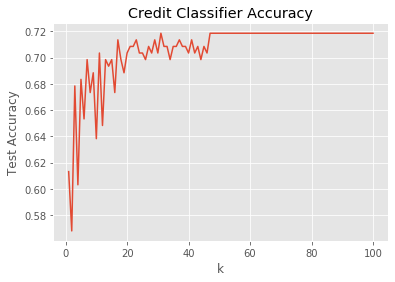

In [159]:
k_list = range(1,101)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(x_train, y_train)
  accuracies.append(classifier.score(x_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Credit Classifier Accuracy")
plt.show()

In [160]:
# K-nearest neighbors
scores = cross_val_score(knn, x_credit_df, y_credit_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print("교차검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))

print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차검증 0 정확도 : 0.7236
교차검증 1 정확도 : 0.6869
교차검증 2 정확도 : 0.7273
교차검증 3 정확도 : 0.6919
교차검증 4 정확도 : 0.7323
평균 정확도 : 0.7124
